# Smoker Status Detection Using Bio-Signals

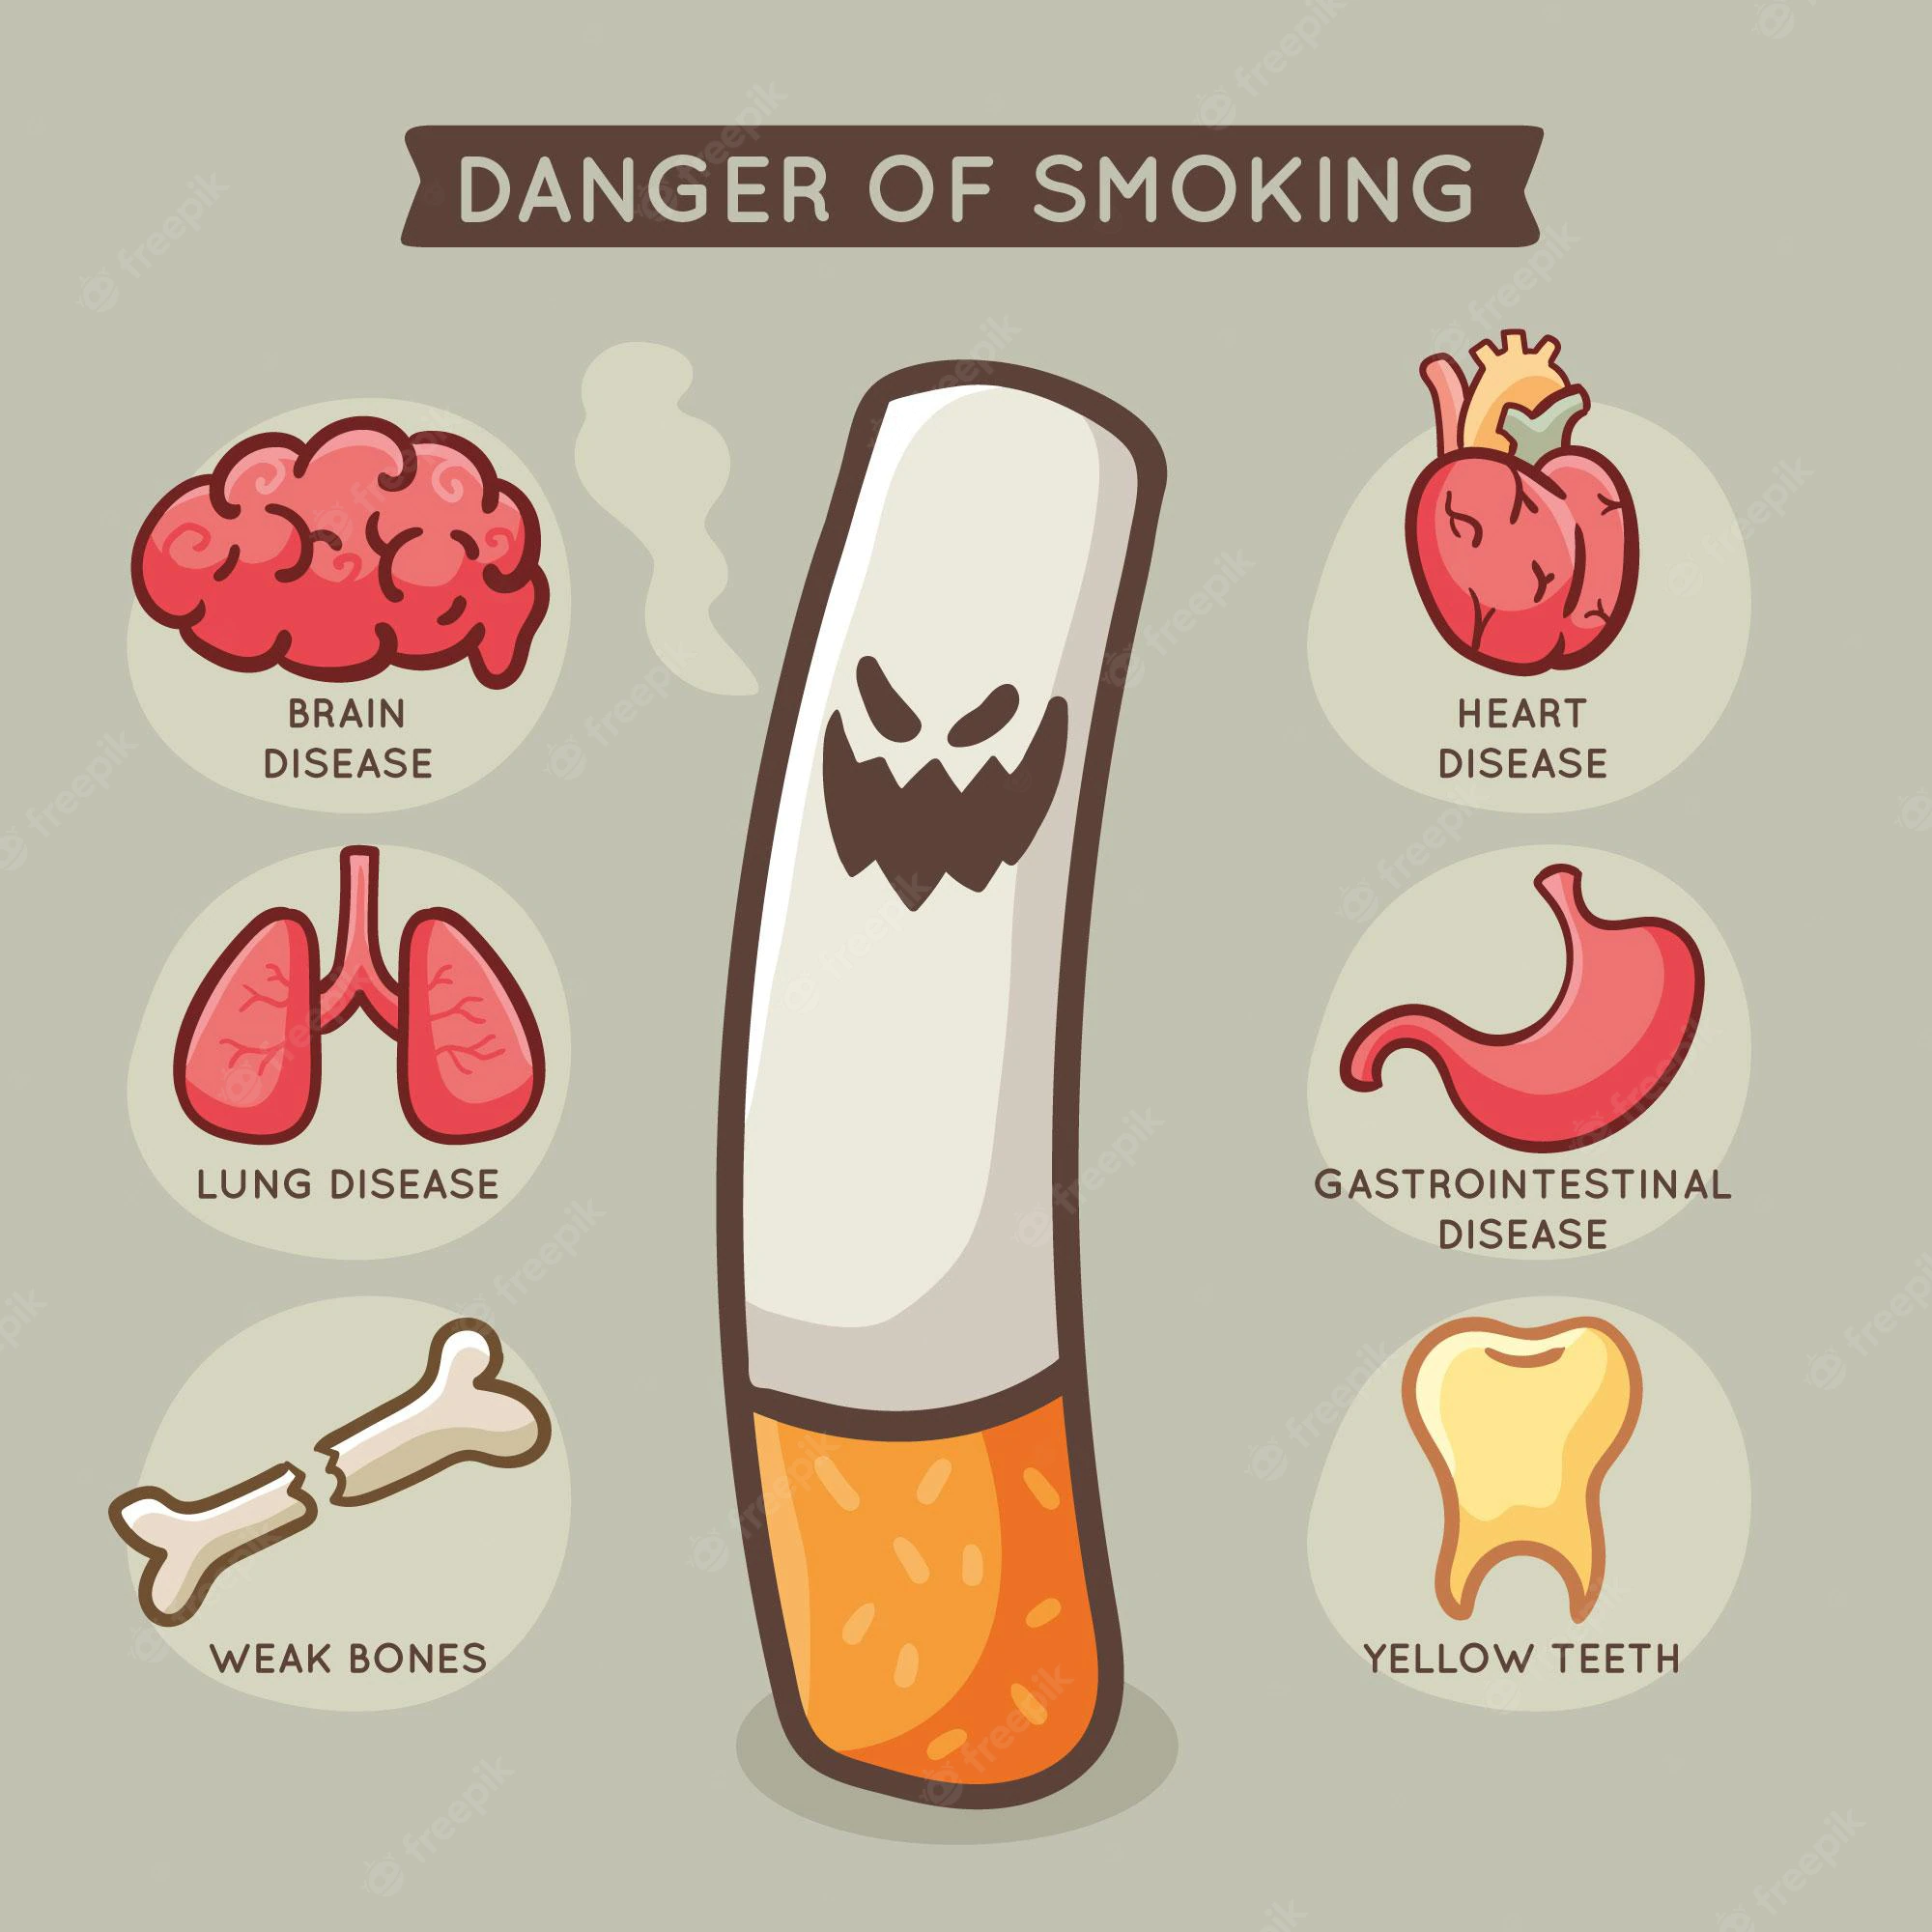

Smoking has been proven to negatively affect health in a multitude of ways.Smoking has been found to harm nearly every organ of the body, cause many diseases, as well as reducing the life expectancy of smokers in general. As of 2018, smoking has been considered the leading cause of preventable morbidity and mortality in the world, continuing to plague the world’s overall health.
 
According to a World Health Organization report, the number of deaths caused by smoking will reach 10 million by 2030.
 
Evidence-based treatment for assistance in smoking cessation had been proposed and promoted. however, only less than one third of the participants could achieve the goal of abstinence. Many physicians found counseling for smoking cessation ineffective and time-consuming, and did not routinely do so in daily practice. To overcome this problem, several factors had been proposed to identify smokers who had a better chance of quitting, including the level of nicotine dependence, exhaled carbon monoxide (CO) concentration, cigarette amount per day, the age at smoking initiation, previous quit attempts, marital status, emotional distress, temperament and impulsivity scores, and the motivation to stop smoking. However, individual use of these factors for prediction could lead to conflicting results that were not straightforward enough for the physicians and patients to interpret and apply. Providing a prediction model might be a favorable way to understand the chance of quitting smoking for each individual smoker. Health outcome prediction models had been developed using methods of machine learning over recent years.
 
A group of scientists are working on predictive models with smoking status as the prediction target.The Task is to help them by creating Machine Learning Model to identify the smoking status of an individual using bio-signals

# Import Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url_df = 'https://drive.google.com/file/d/1RoHxCPov-bGRKLiZ5a9t_Frc9VfqUAJh/view?usp=share_link'
path_df = 'https://drive.google.com/uc?export=download&id='+url_df.split('/')[-2]
df = pd.read_csv(path_df)

In [ ]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [ ]:
df.shape

(38984, 23)

In [ ]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


# Data Cleaning

## Missing Value

In [ ]:
df.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

No Missing values from the dataset

## Checking Outliers

We use boxplot for outliers detection

<Axes: >

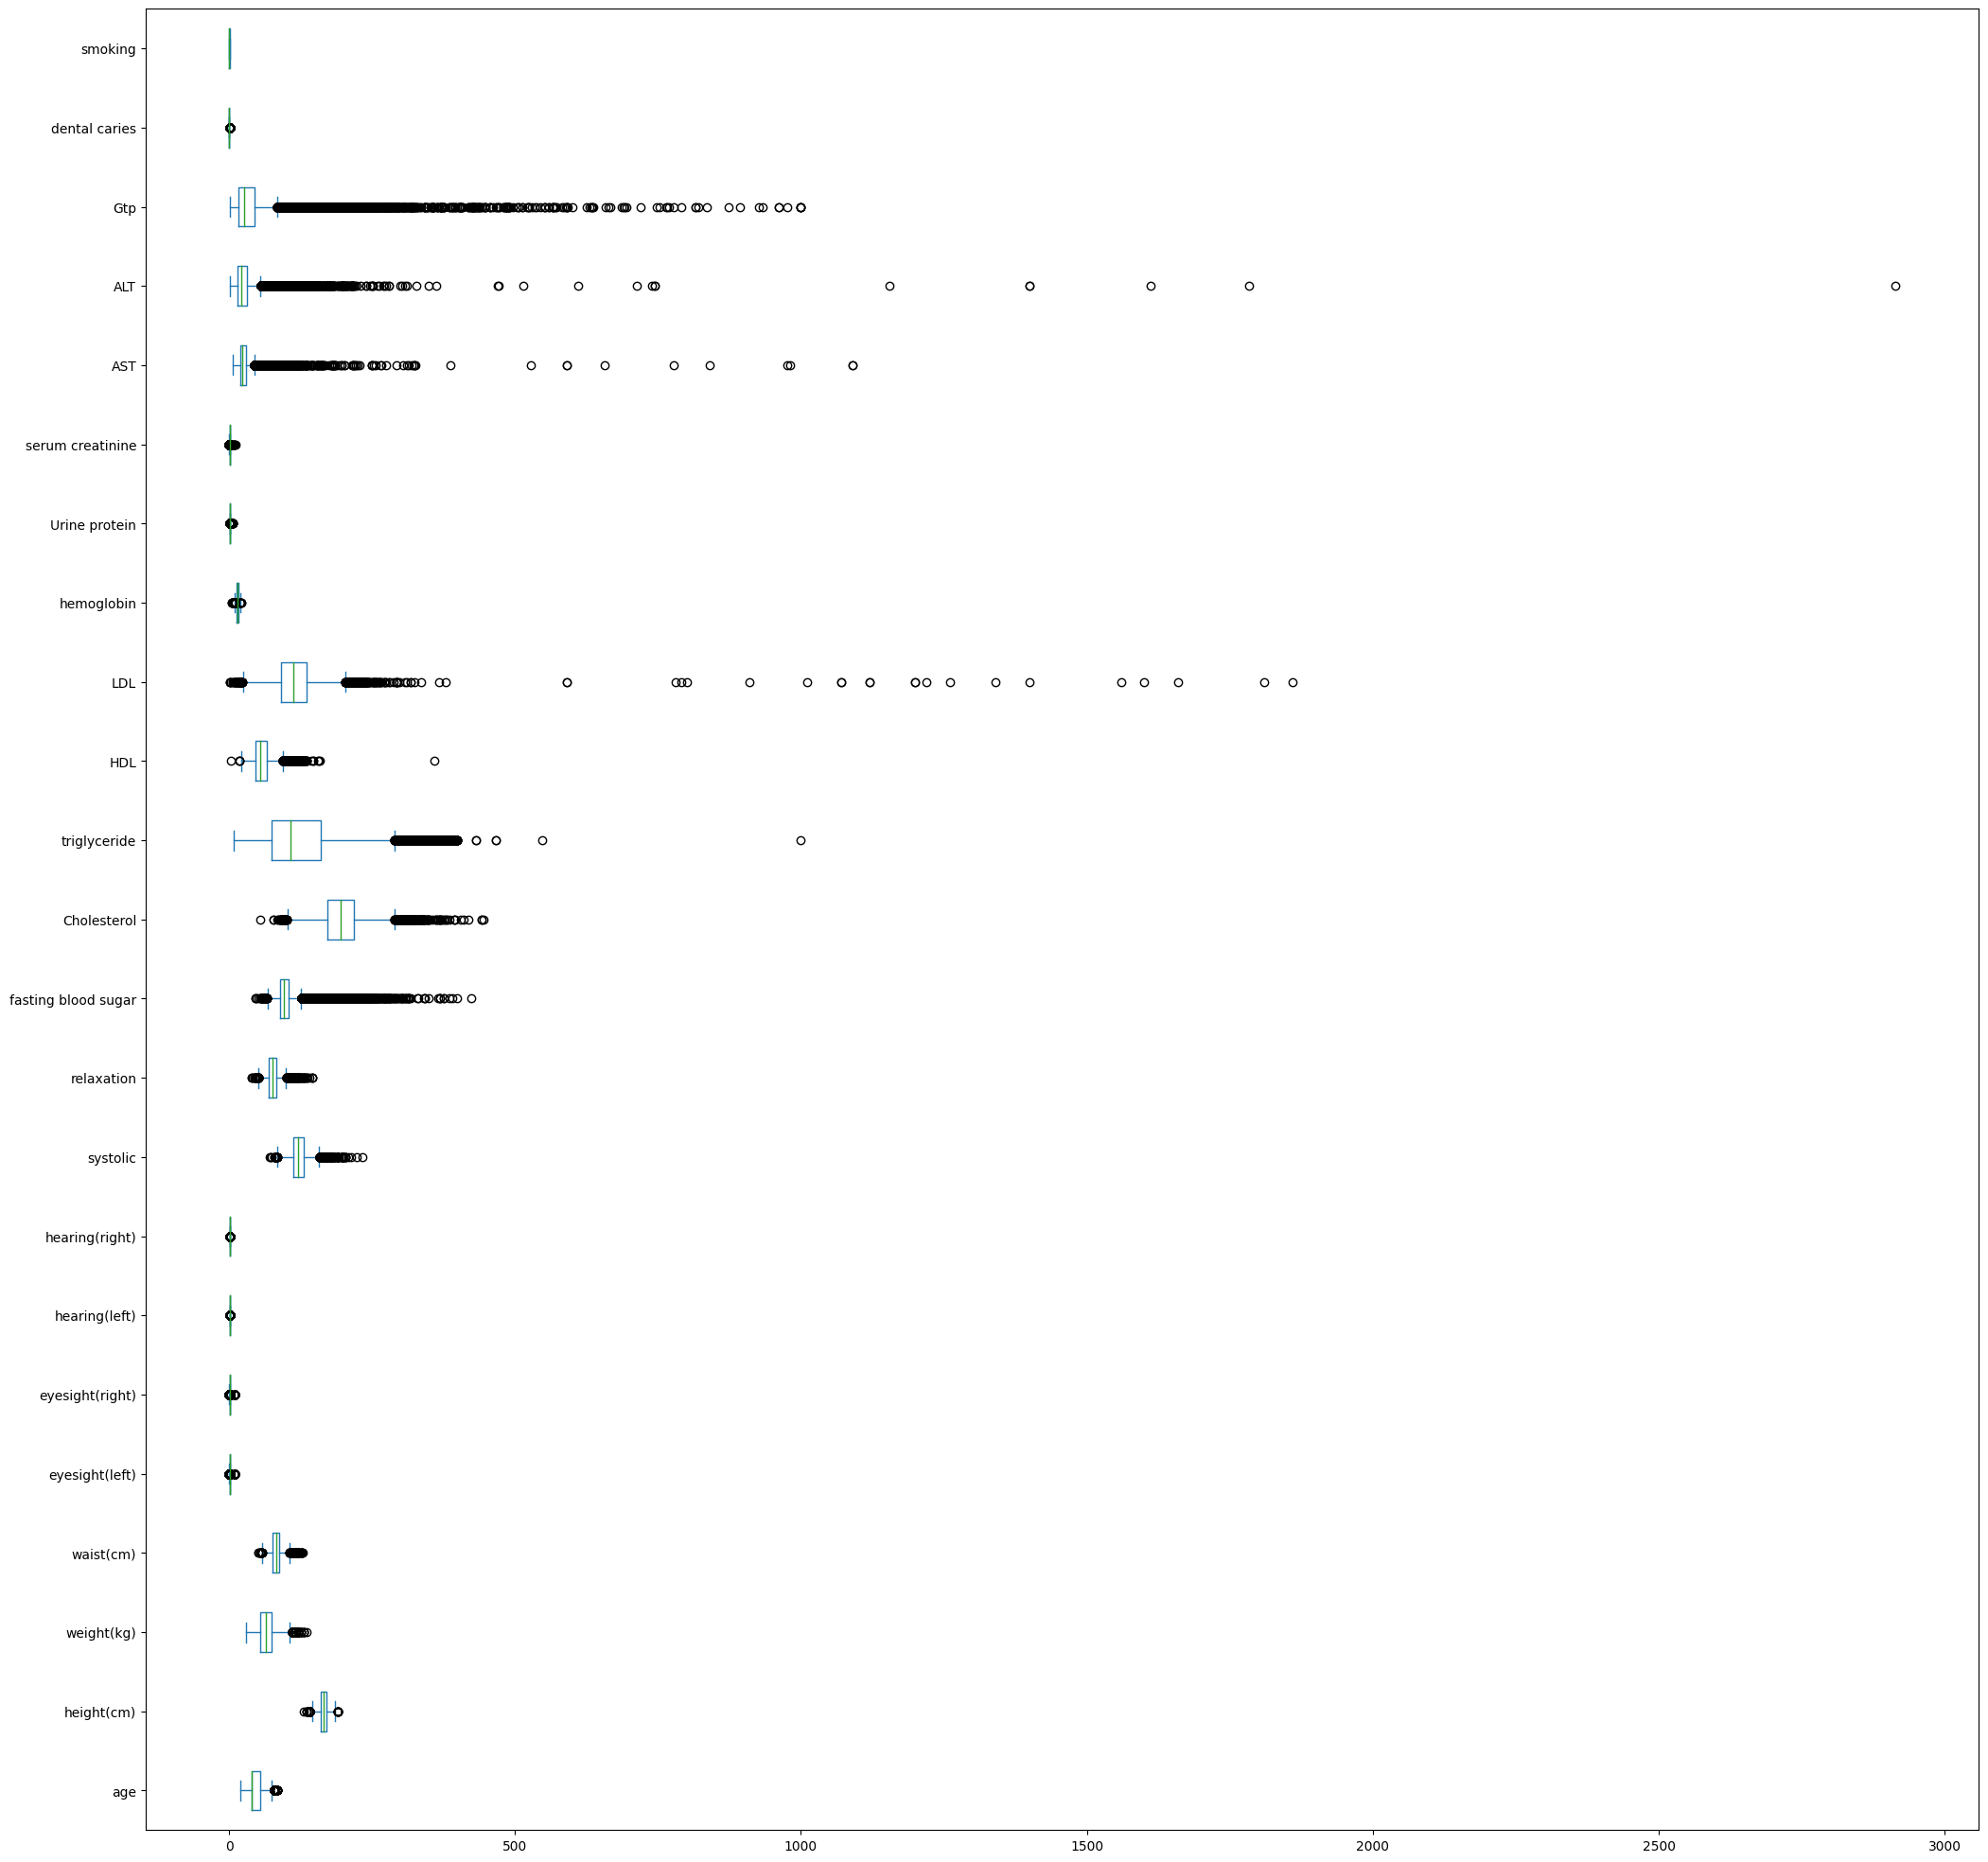

In [ ]:
df.plot(kind='box',figsize=(25,25), vert=False)

We see some high outliers in Gtp, LDL and Fasting Blood Sugar. For Outliers removal itself will be filtered using IQR

### Remove Outliers from GTP

In [ ]:
# Hitung kuartil 1 dan 3
Q1 = df['Gtp'].quantile(0.25)
Q3 = df['Gtp'].quantile(0.75)

#Hitung interkuartil range
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 17.0

Q3:
 44.0

IQR:
 27.0

Min:
 -23.5

Max:
 84.5


In [ ]:
filter_min = df['Gtp']<boxplot_min
filter_max = df['Gtp']>boxplot_max

df_cl = df[~(filter_min|filter_max)]

df_cl.shape

(35609, 23)

<Axes: >

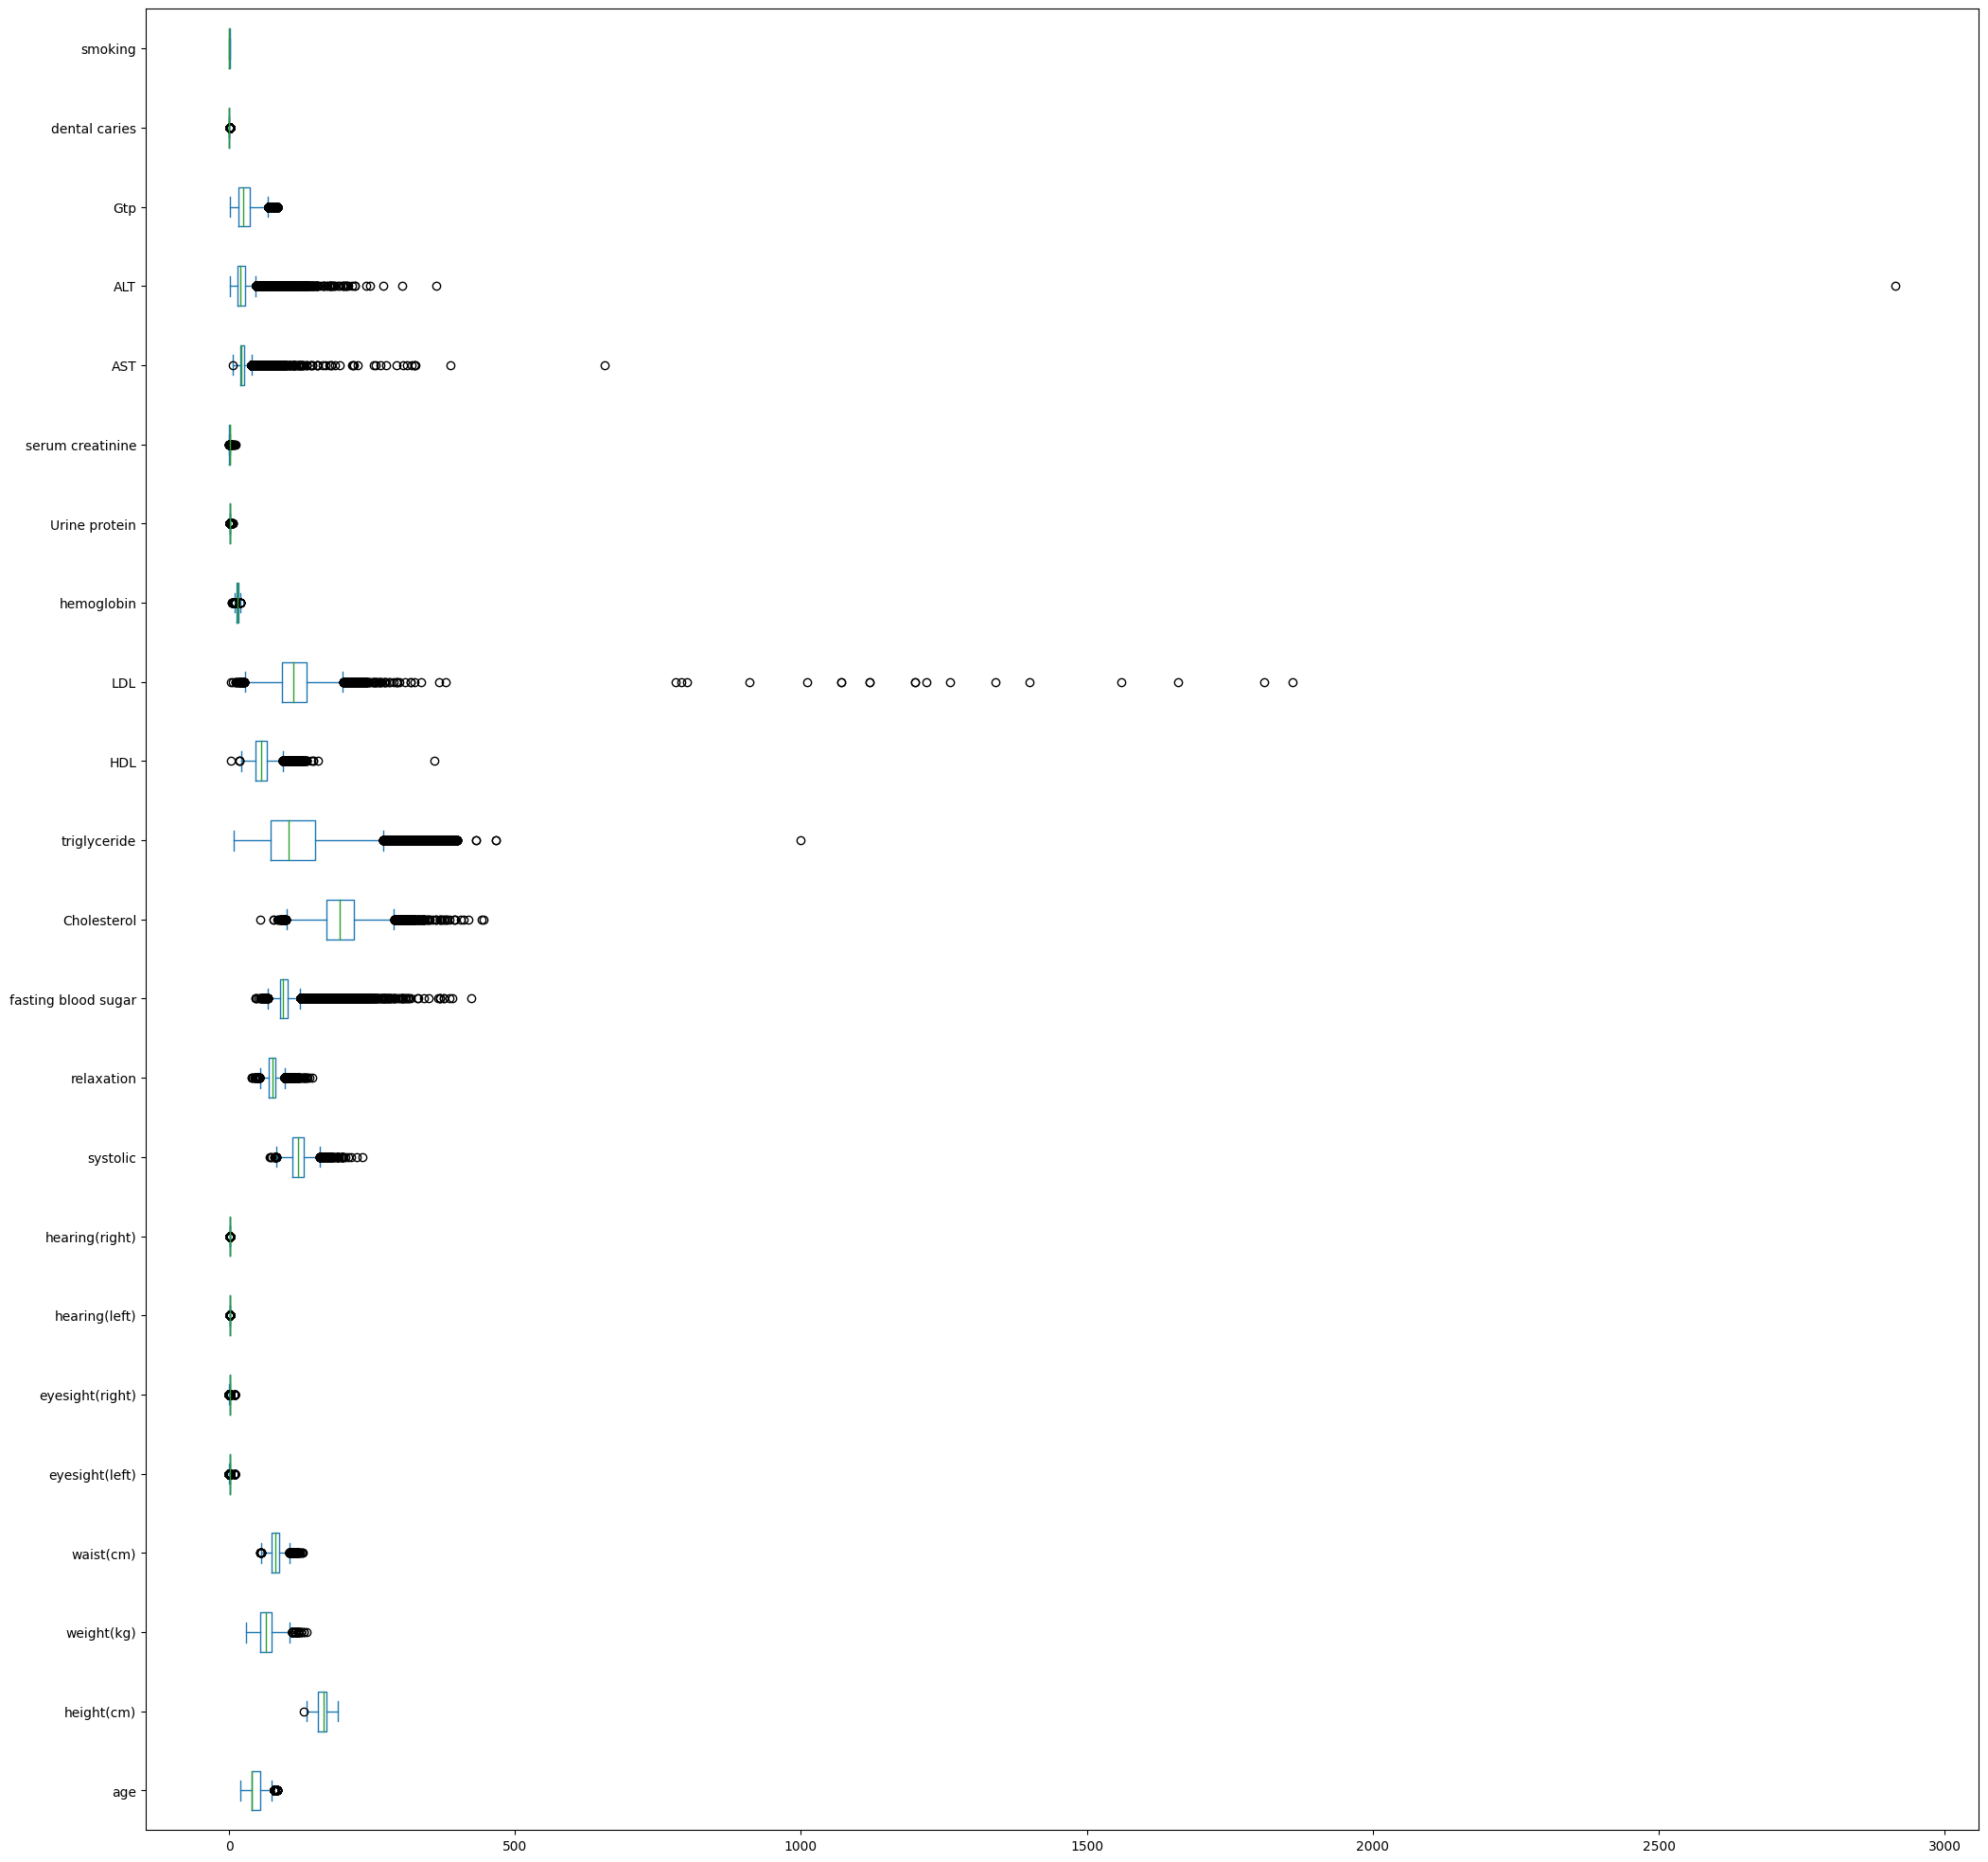

In [ ]:
df_cl.plot(kind='box',figsize=(25,25), vert=False)

### Remove Outliers from LDL

In [ ]:
Q1 = df_cl['LDL'].quantile(0.25)
Q3 = df_cl['LDL'].quantile(0.75)

#Hitung interkuartil range
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 92.0

Q3:
 135.0

IQR:
 43.0

Min:
 27.5

Max:
 199.5


In [ ]:
filter_min = df_cl['LDL']<boxplot_min
filter_max = df_cl['LDL']>boxplot_max

df_cl1 = df_cl[~(filter_min|filter_max)]

df_cl1.shape

(35152, 23)

<Axes: >

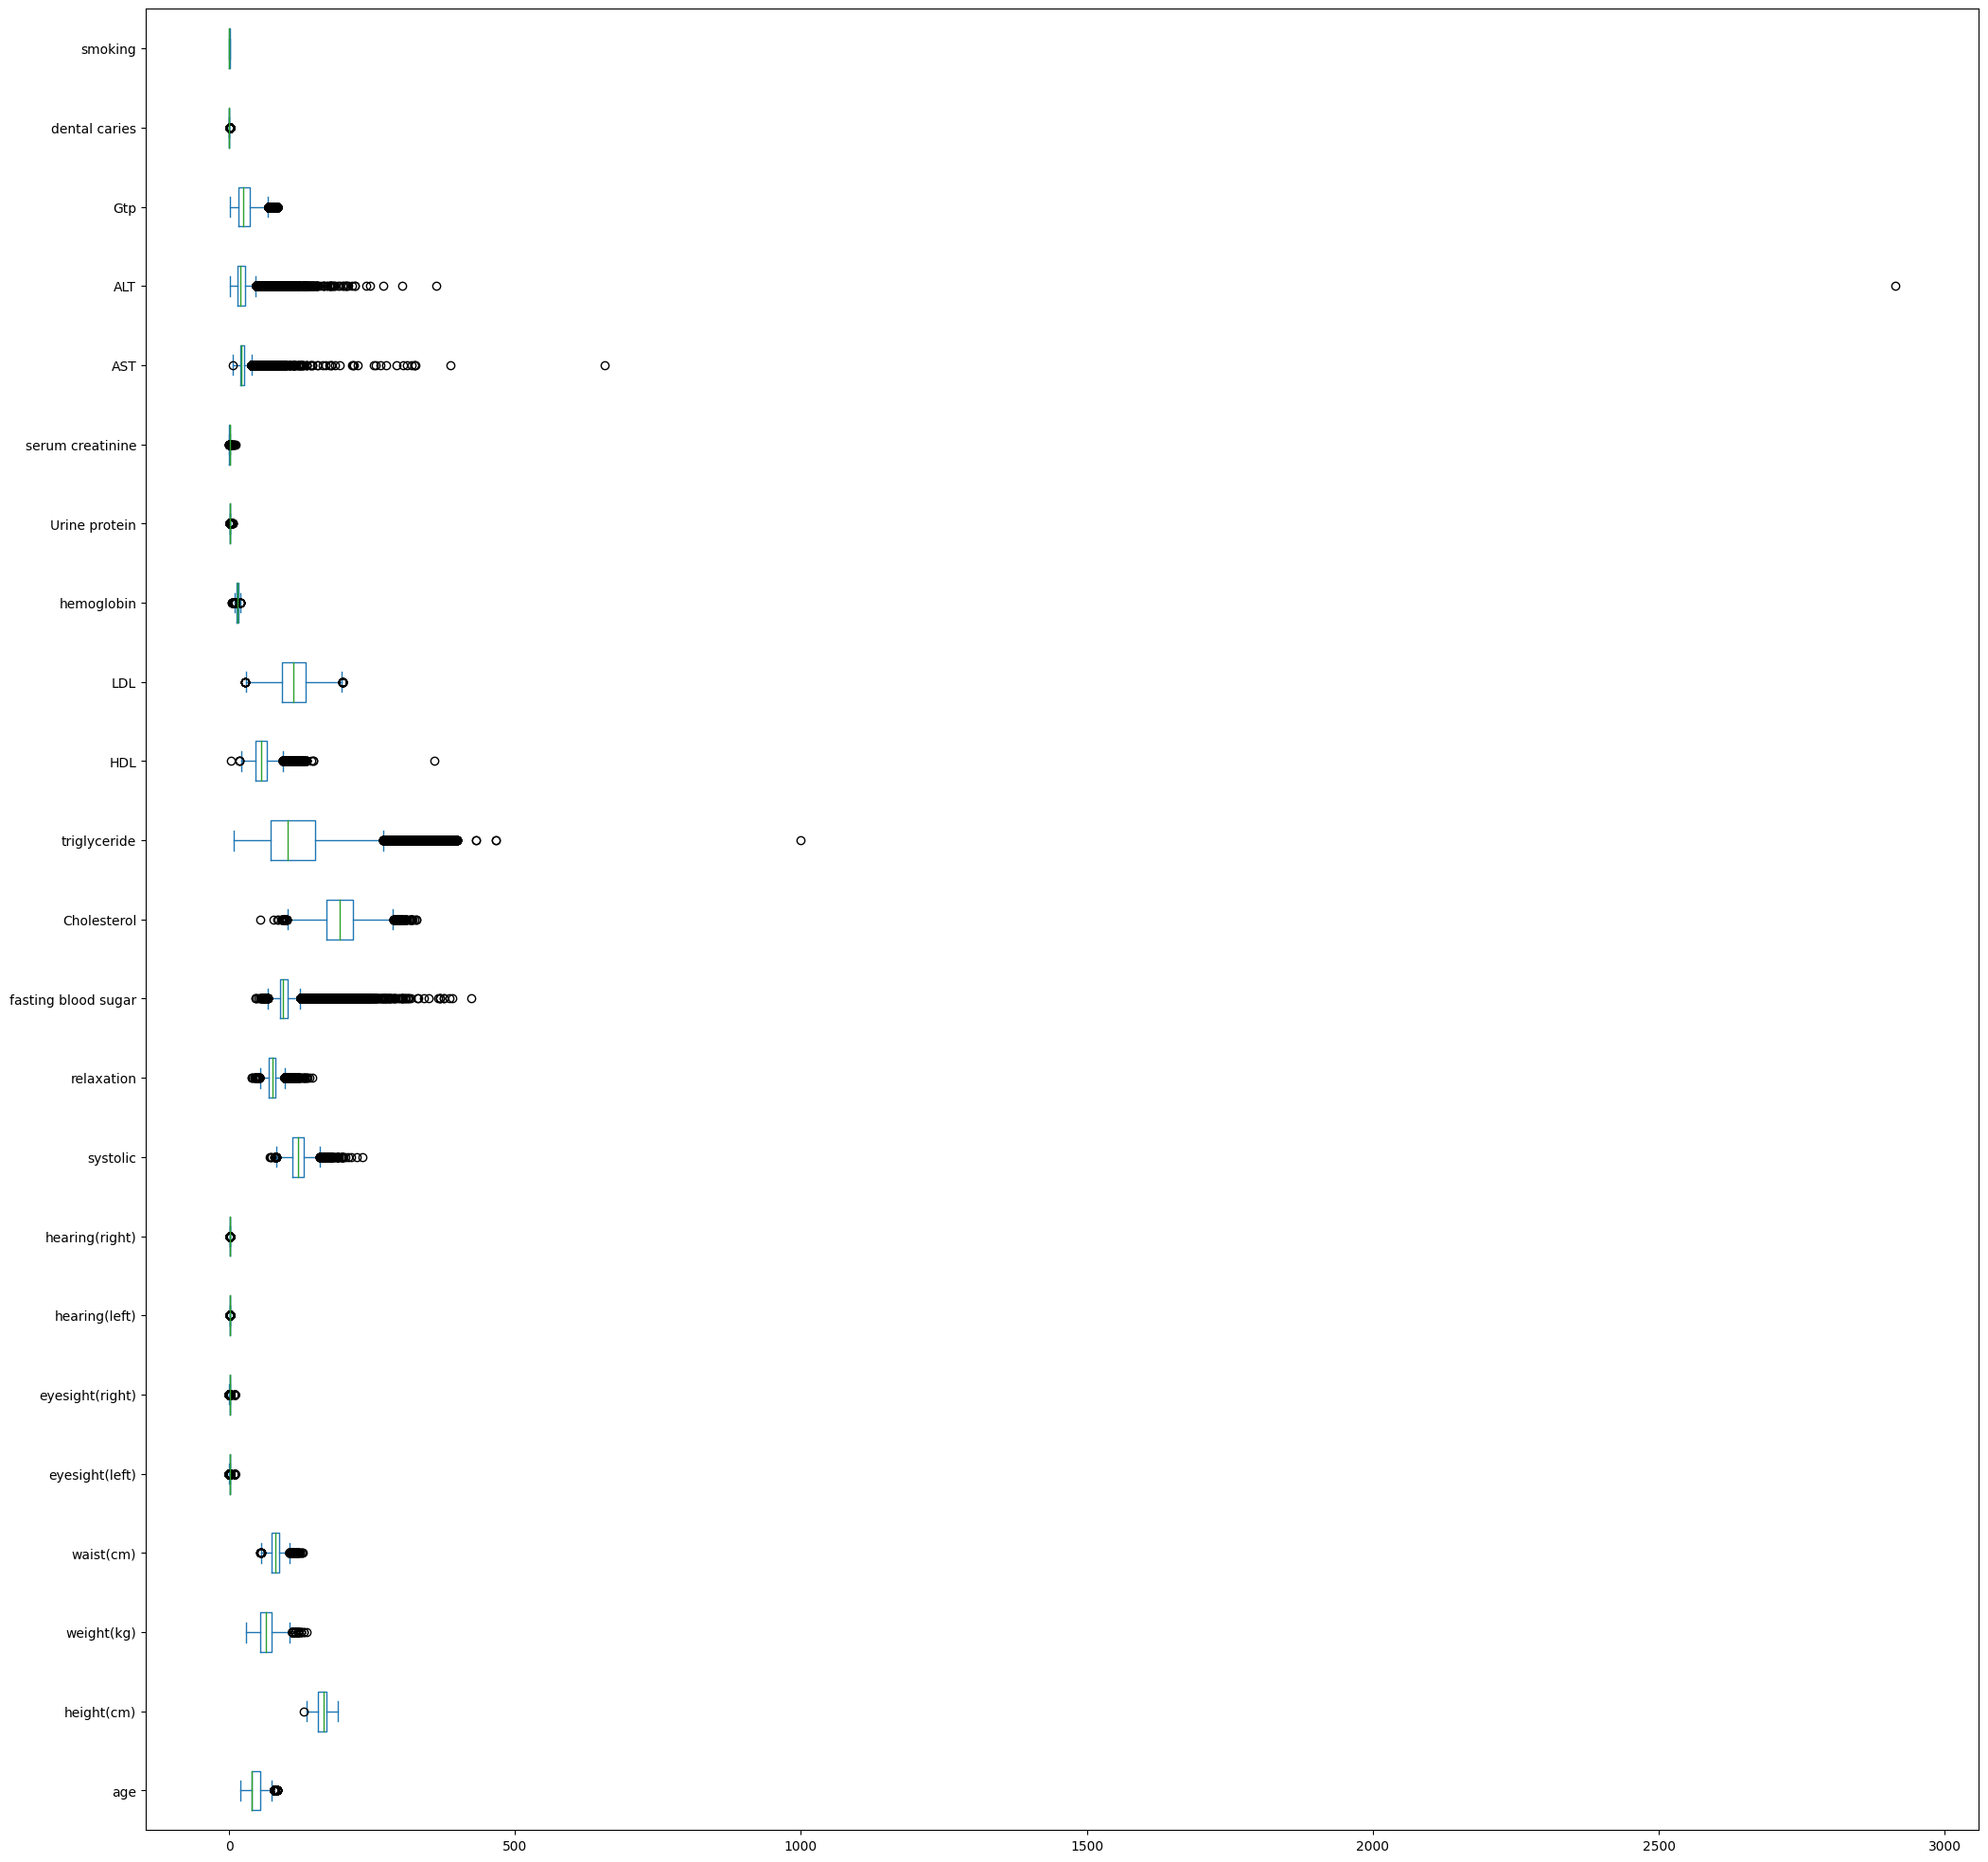

In [ ]:
df_cl1.plot(kind='box',figsize=(25,25), vert=False)

### Remove Outliers from Fasting Blood Sugar

In [ ]:
Q1 = df_cl1['fasting blood sugar'].quantile(0.25)
Q3 = df_cl1['fasting blood sugar'].quantile(0.75)

#Hitung interkuartil range
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 89.0

Q3:
 103.0

IQR:
 14.0

Min:
 68.0

Max:
 124.0


In [ ]:
filter_min = df_cl1['fasting blood sugar']<boxplot_min
filter_max = df_cl1['fasting blood sugar']>boxplot_max

df_cl2 = df_cl1[~(filter_min|filter_max)]

df_cl2.shape

(33176, 23)

<Axes: >

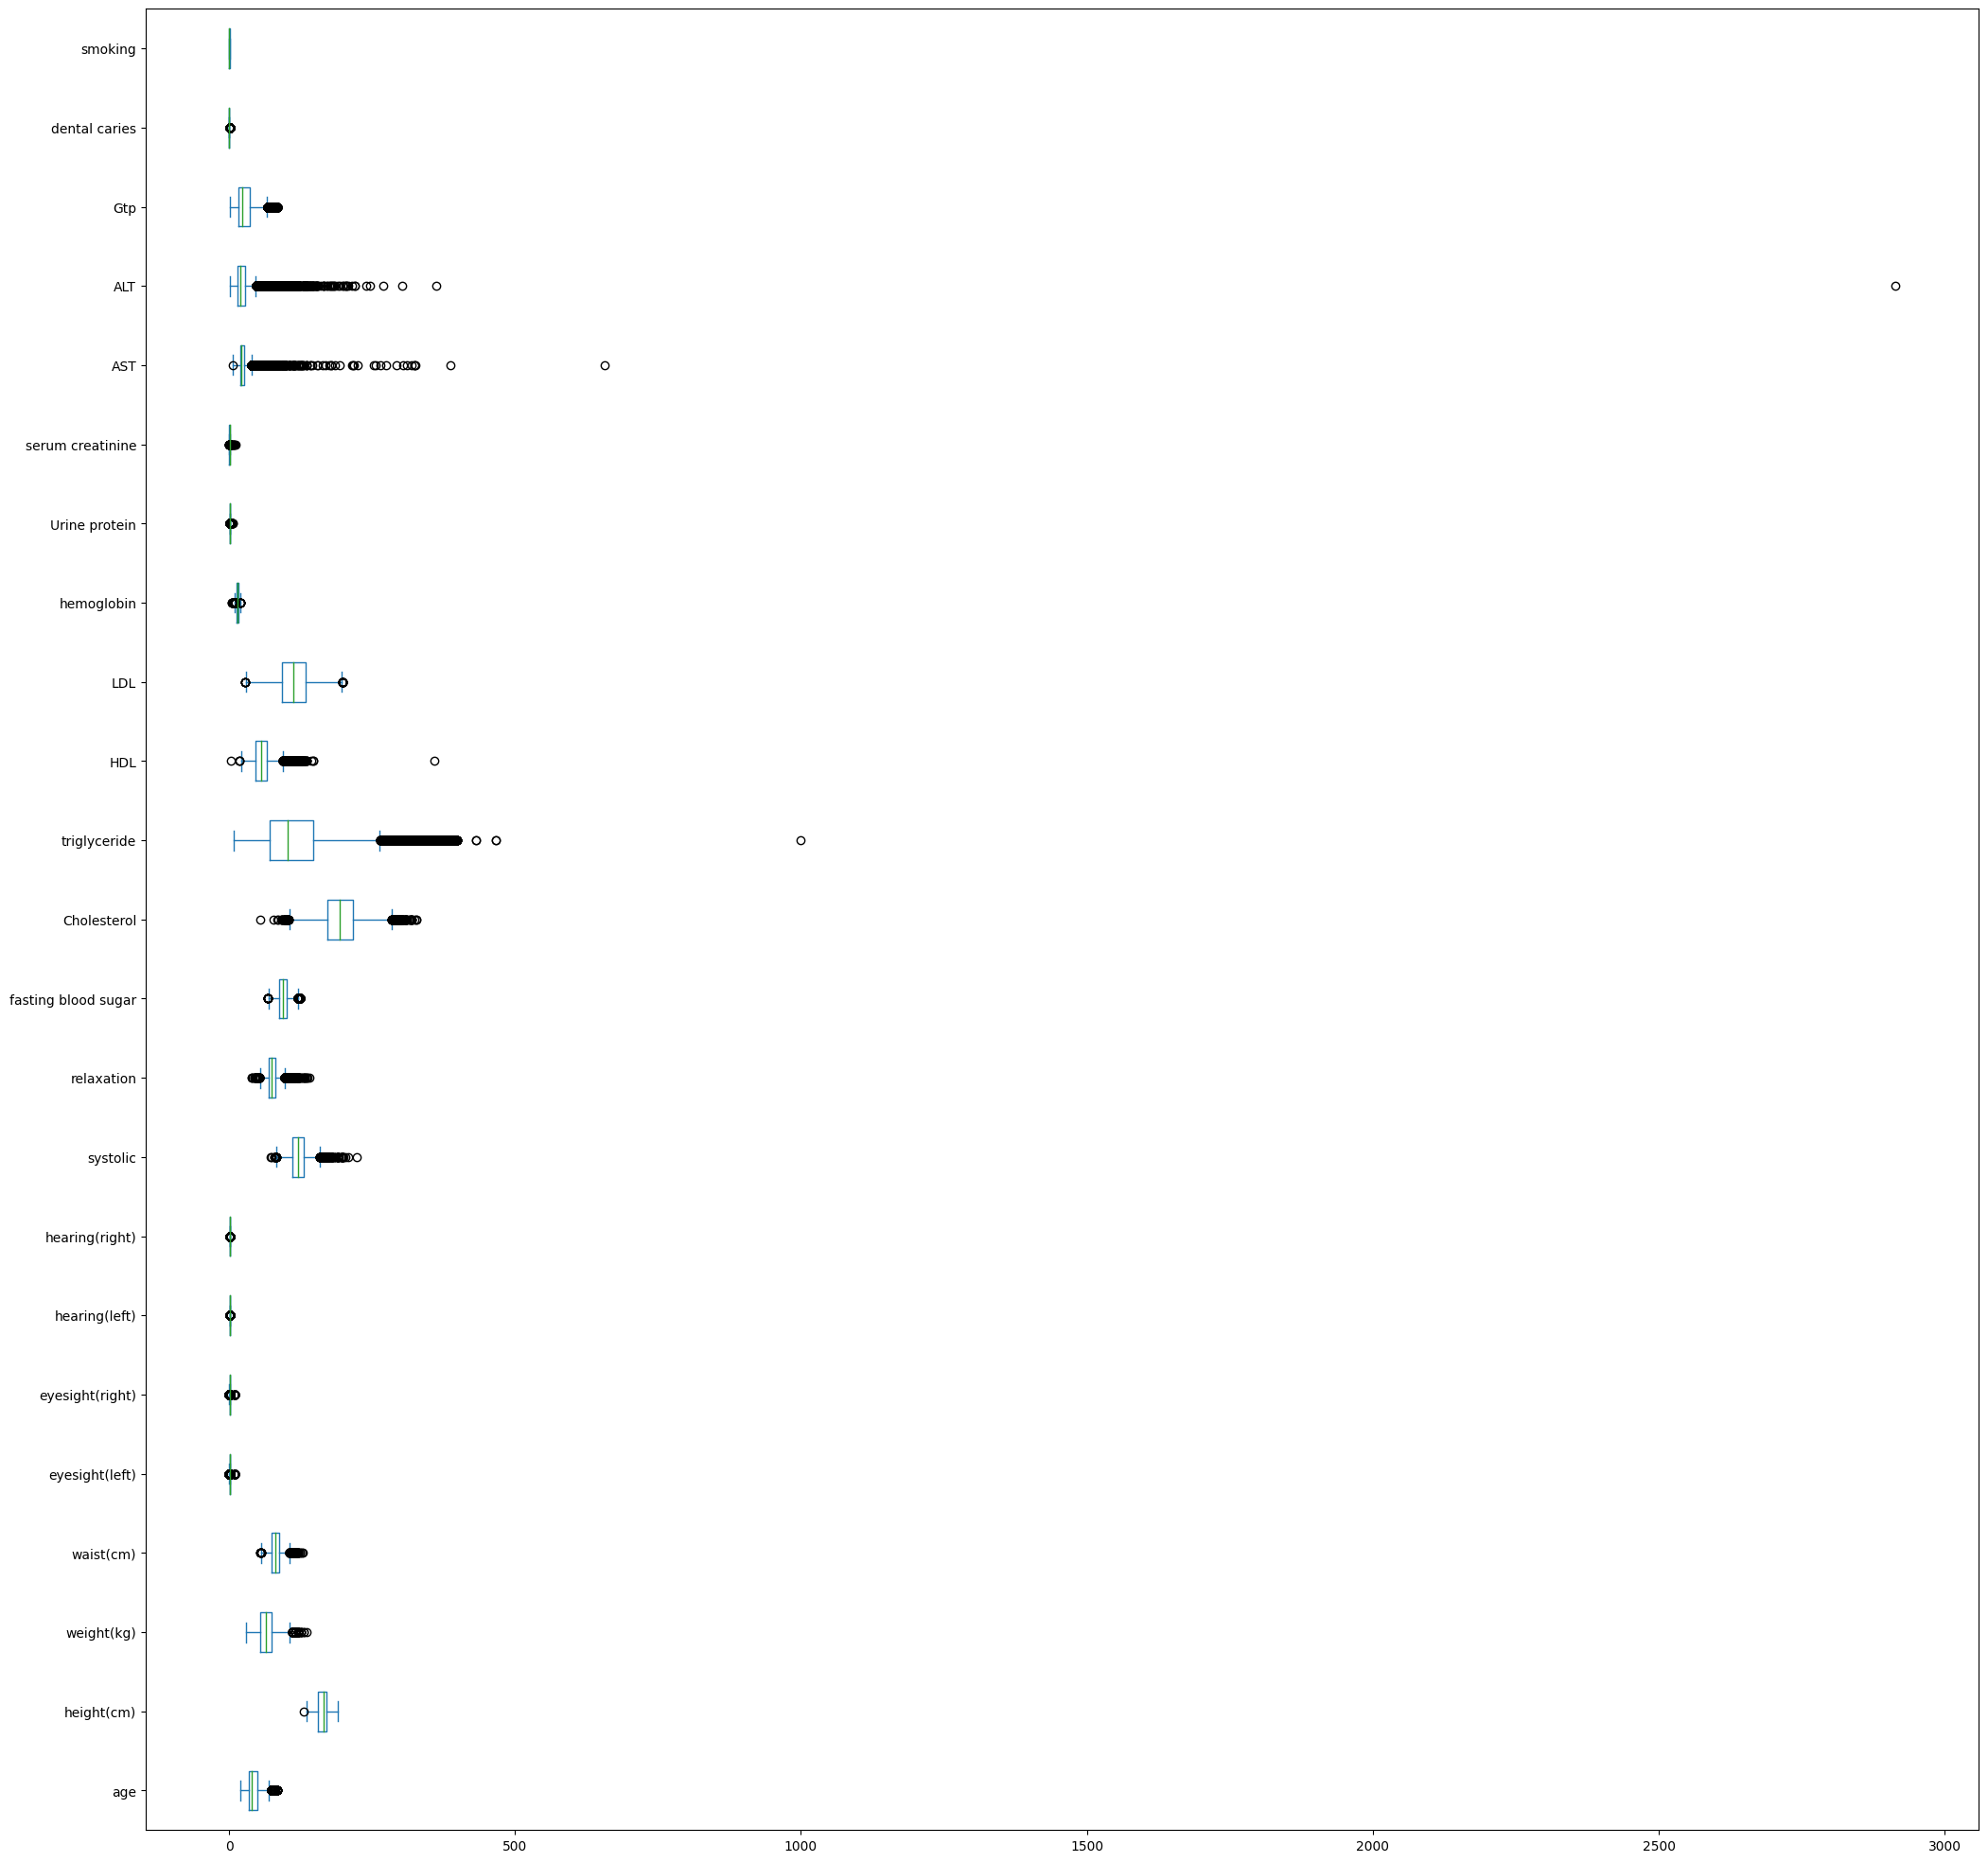

In [ ]:
df_cl2.plot(kind='box',figsize=(25,25), vert=False)

## Copy Cleaned Dataframe

In [ ]:
df01=df_cl2.copy()

# EDA

In [ ]:
list(df01.columns)

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

In [ ]:
df01.describe(include='all')

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000,...,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000,33176.000000
mean,43.656559,164.463015,65.071588,81.202969,1.019996,1.012708,1.024295,1.024506,120.586960,75.390885,...,57.747589,113.999729,14.526209,1.072402,0.880094,24.408850,24.086177,28.470702,0.210845,0.332560
std,12.064662,9.278020,12.576644,9.093032,0.501811,0.484286,0.153965,0.154615,13.341406,9.454414,...,14.616544,30.642327,1.567538,0.357421,0.217884,11.713812,22.521281,16.609859,0.407915,0.471137
min,20.000000,130.000000,30.000000,54.000000,0.100000,0.100000,1.000000,1.000000,72.000000,40.000000,...,4.000000,28.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,35.000000,155.000000,55.000000,75.000000,0.800000,0.800000,1.000000,1.000000,111.000000,70.000000,...,47.000000,92.000000,13.500000,1.000000,0.700000,19.000000,15.000000,16.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,75.000000,...,56.000000,113.000000,14.700000,1.000000,0.900000,22.000000,20.000000,23.000000,0.000000,0.000000
75%,50.000000,170.000000,75.000000,87.000000,1.200000,1.200000,1.000000,1.000000,130.000000,81.000000,...,66.000000,134.000000,15.700000,1.000000,1.000000,27.000000,28.000000,36.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,223.000000,140.000000,...,359.000000,199.000000,20.400000,6.000000,11.600000,656.000000,2914.000000,84.000000,1.000000,1.000000


### Numbers of Smokers vs Non-smokers

In [ ]:
df_smoking = df01['smoking'].value_counts().rename_axis('smoking').reset_index(name='counts')
df_smoking

,smoking,counts
0,0,22143
1,1,11033


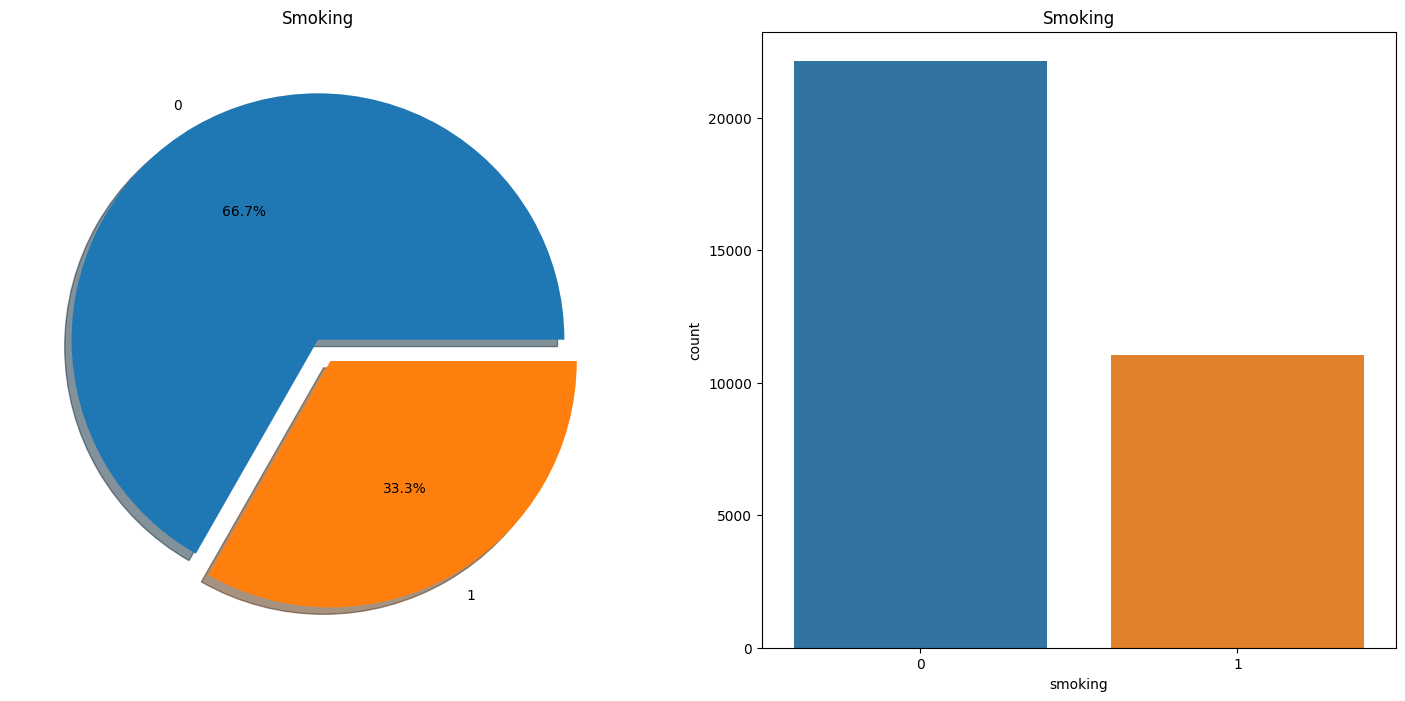

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df01['smoking'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Smoking')
ax[0].set_ylabel('')
sns.countplot(x=df01['smoking'],order = df01['smoking'].value_counts().index,ax=ax[1])
ax[1].set_title('Smoking')
plt.show()

Right away we can see some imbalanced in numbers of people who smoke and people who don't smoke. Number those who smoke is 33% of those who don't smoke

## Filter people who smoke

In [ ]:
dfsmoke=df01.loc[df01['smoking']==1]
dfsmoke.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
5,60,160,50,78.0,1.0,0.9,2,2,126,75,...,98,64,13.9,1,1.0,47,23,70,0,1
7,40,180,75,85.0,1.5,1.5,1,1,110,60,...,58,99,14.0,2,1.4,29,20,32,1,1
10,40,160,60,77.6,0.5,0.5,1,1,130,80,...,63,73,14.3,1,0.5,19,13,9,0,1
24,30,175,75,84.0,1.2,1.2,1,1,120,80,...,37,91,15.4,1,1.0,19,22,19,1,1
28,60,165,65,85.0,0.7,0.9,1,1,115,70,...,43,111,16.0,1,1.0,19,16,34,1,1


In [ ]:
list(dfsmoke.columns)

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

### Age Distribution of People Who Smoke

<Axes: xlabel='age', ylabel='Count'>

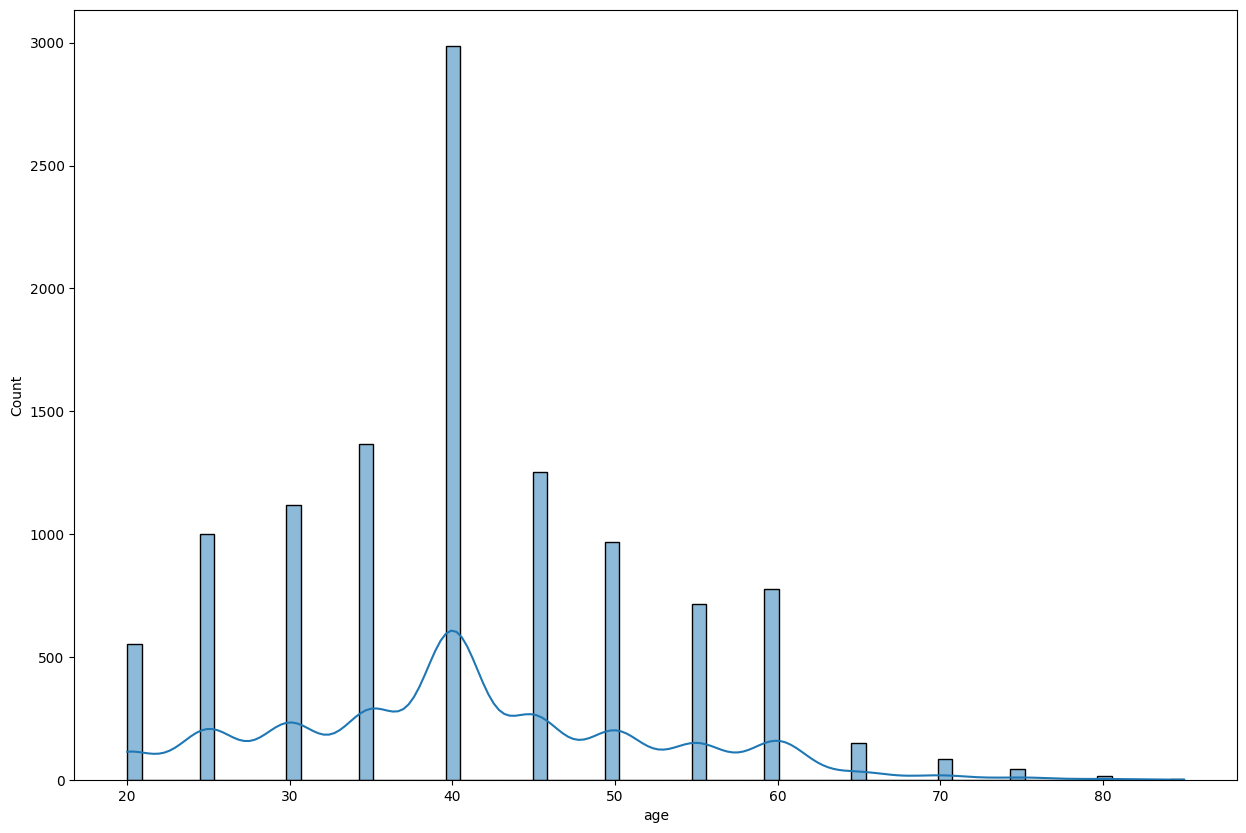

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='age', data = dfsmoke,  kde=True )

From the age disribution we can see that the highest number of smoker are those who are 40 yeares old

### Weight Distribution of People Who Smoke

<Axes: xlabel='weight(kg)', ylabel='Count'>

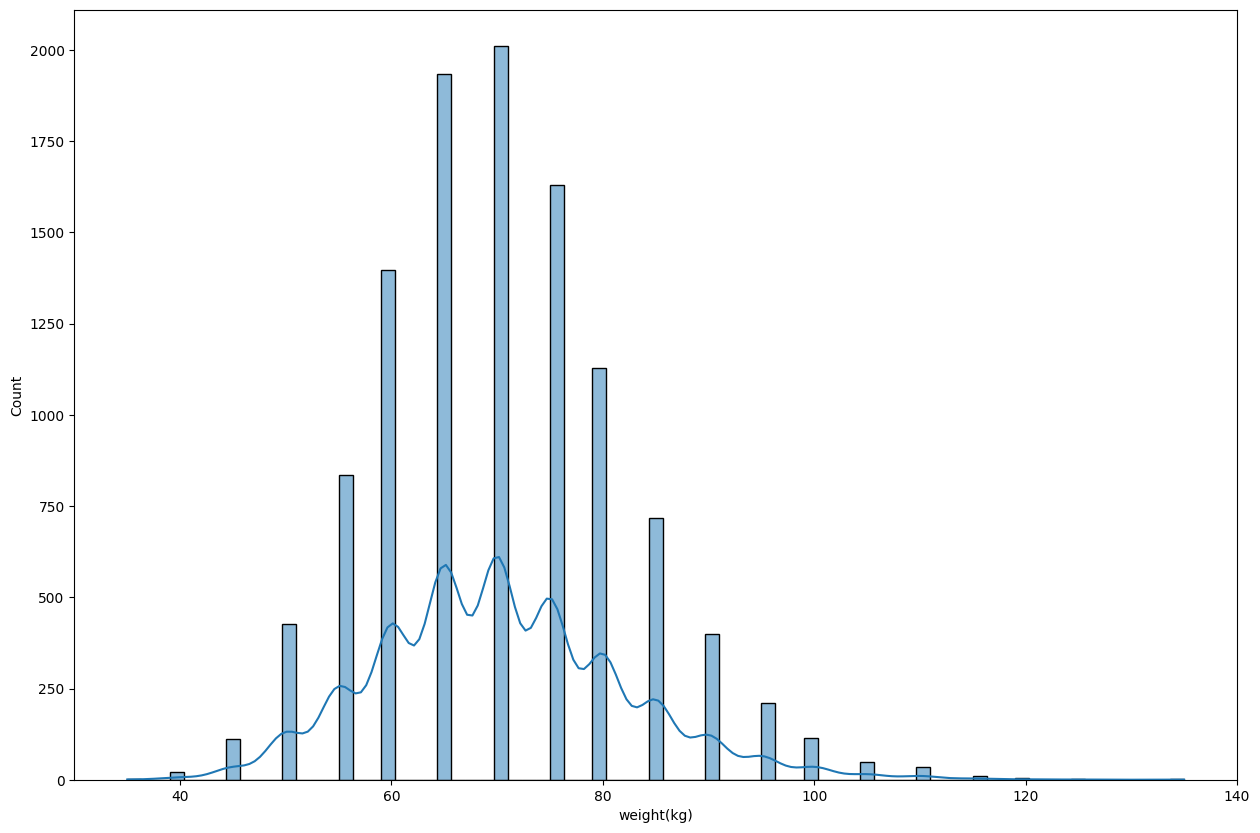

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='weight(kg)', data = dfsmoke,  kde=True )

The highest number of weight distribution of those who smoke are people with weight around 70 kg.

### Height Distribution of People Who Smoke

<Axes: xlabel='height(cm)', ylabel='Count'>

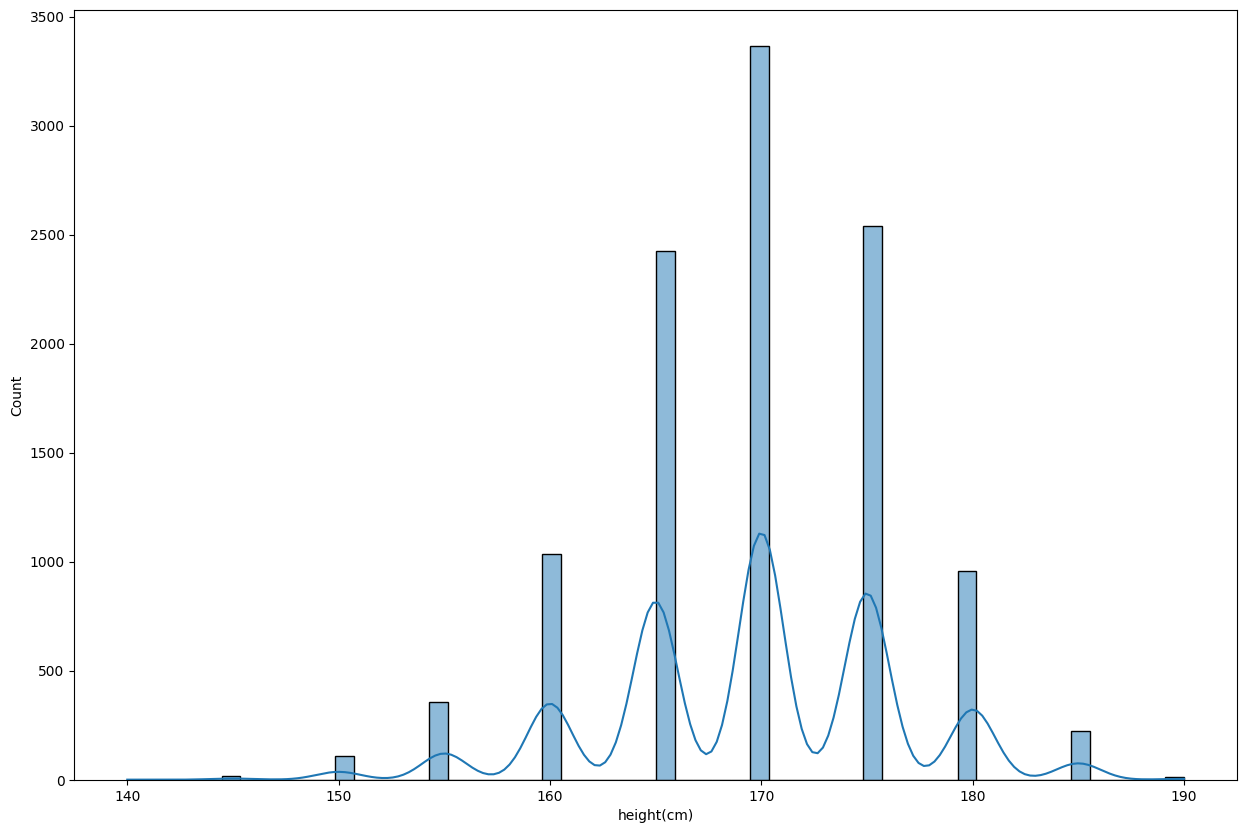

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='height(cm)', data = dfsmoke,  kde=True )

People whose height 170 cm are the highest among of those who smoke. If we use 170-110 ideal weight of those who smoke should be around 60 kg. from the weight distribution above, it's possible that people who smoke relatively overweight by 10 kg

### Effect of Smoking to Fasting Blood Sugar

<Axes: xlabel='fasting blood sugar', ylabel='Count'>

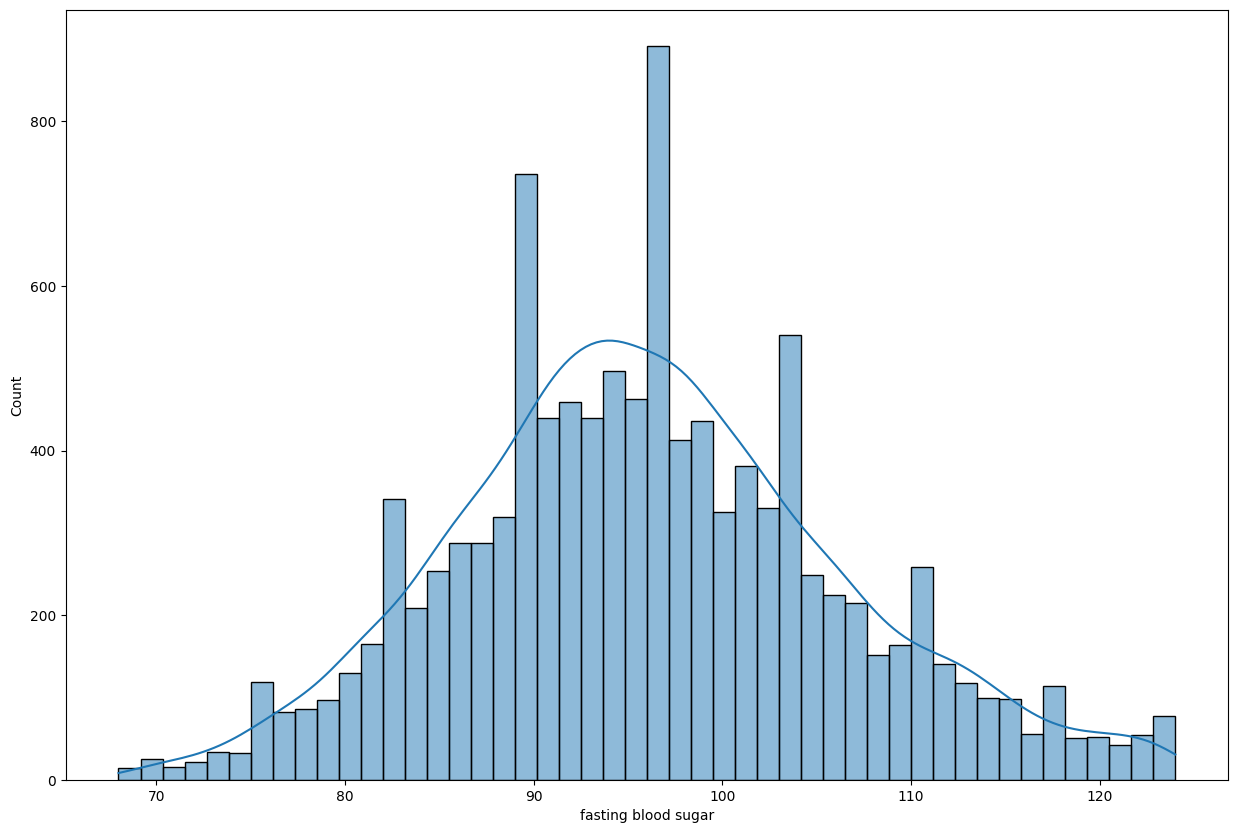

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='fasting blood sugar', data = dfsmoke,  kde=True )

From the histogram above we can see that smoking has little to no effect in Fasting Blood Sugar

### Smoking effect to Systolic

<Axes: xlabel='systolic', ylabel='Count'>

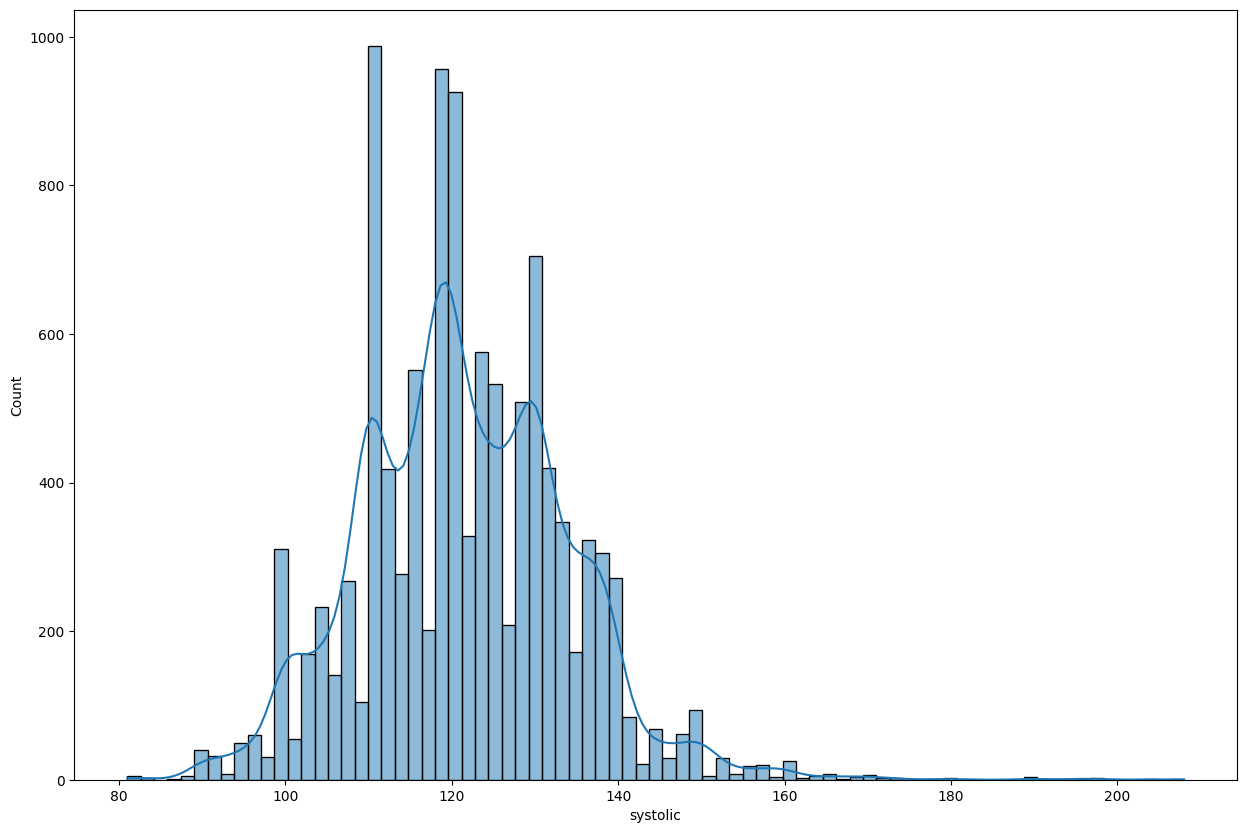

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='systolic', data = dfsmoke,  kde=True )

From the histrogram we can see however that smoking cause relatively high blood pressure with systolic above 100

### Smoking Effect to Carries

<Axes: xlabel='relaxation', ylabel='Count'>

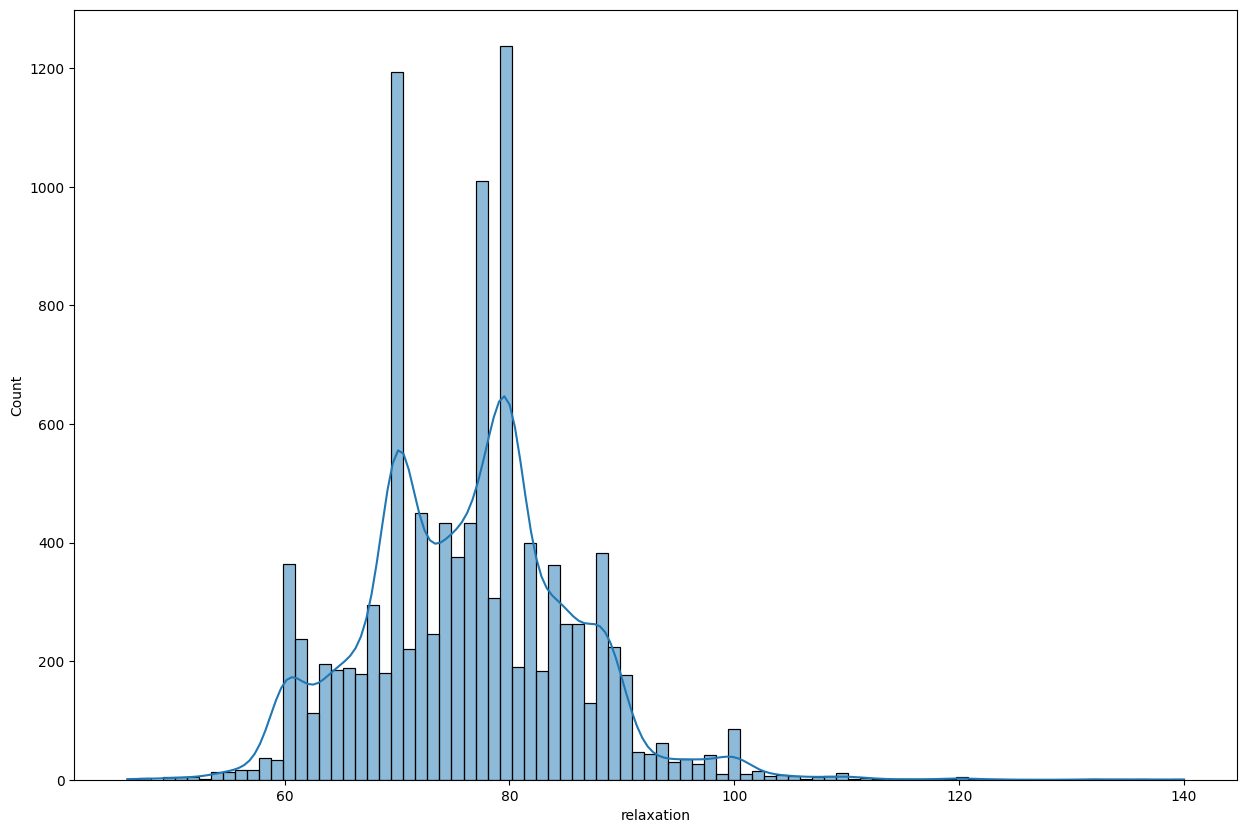

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x ='relaxation', data = dfsmoke,  kde=True )

In [ ]:
df_teeth = dfsmoke['dental caries'].value_counts().rename_axis('dental caries').reset_index(name='counts')
df_teeth

,dental caries,counts
0,0,7990
1,1,3043


From the histogram and counts of number dental carries people who smoke, it seems that smoking don't affect dental carries

## Insight From EDA

**From the EDA we can draw insight as follow:**
1. People who smoke mostly of those of 40 years old
2. Smoking might cause overweight
3. Smoking definetly cause high blood pressure

# Correlation Heatmap

<Axes: >

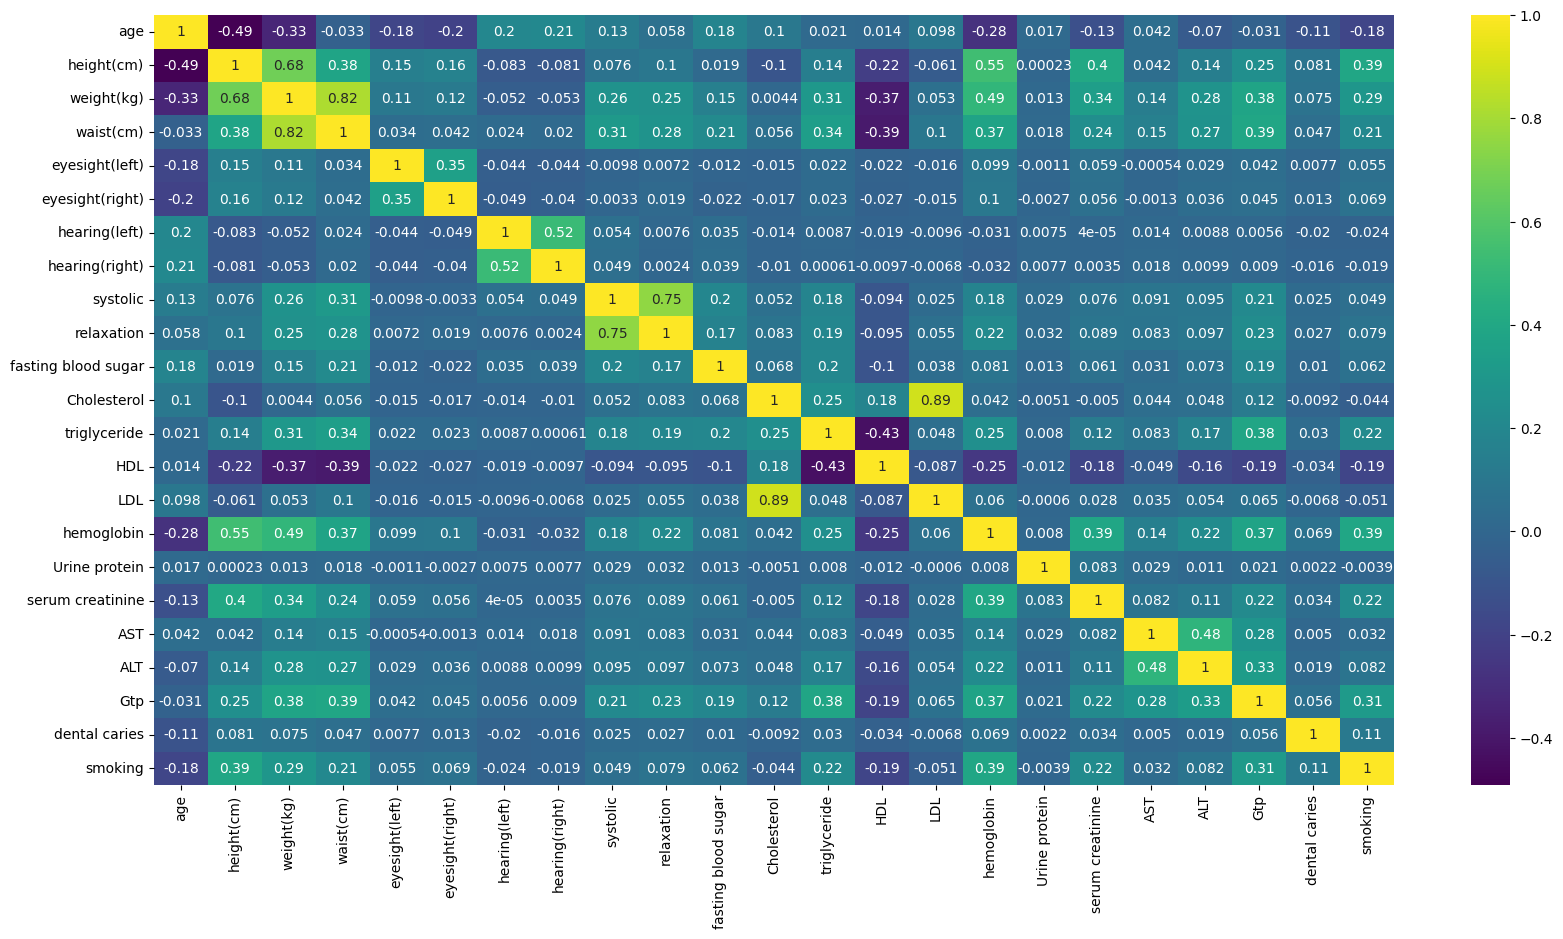

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df01.corr(), annot=True, cmap='viridis')

There are three parameters that cause high multicollinearity. LDL, Waist and Relaxation. We can drop these 3 parameters

In [ ]:
df02=df01.copy()

In [ ]:
df02.drop(['relaxation'], axis=1, inplace=True)

In [ ]:
df02.drop(['LDL'],axis=1, inplace=True)

In [ ]:
df02.drop(['waist(cm)'],axis=1, inplace=True)

In [ ]:
list(df02.columns)

['age',
 'height(cm)',
 'weight(kg)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

### Heatmap after Removing Paramaters With High Collinearity

<Axes: >

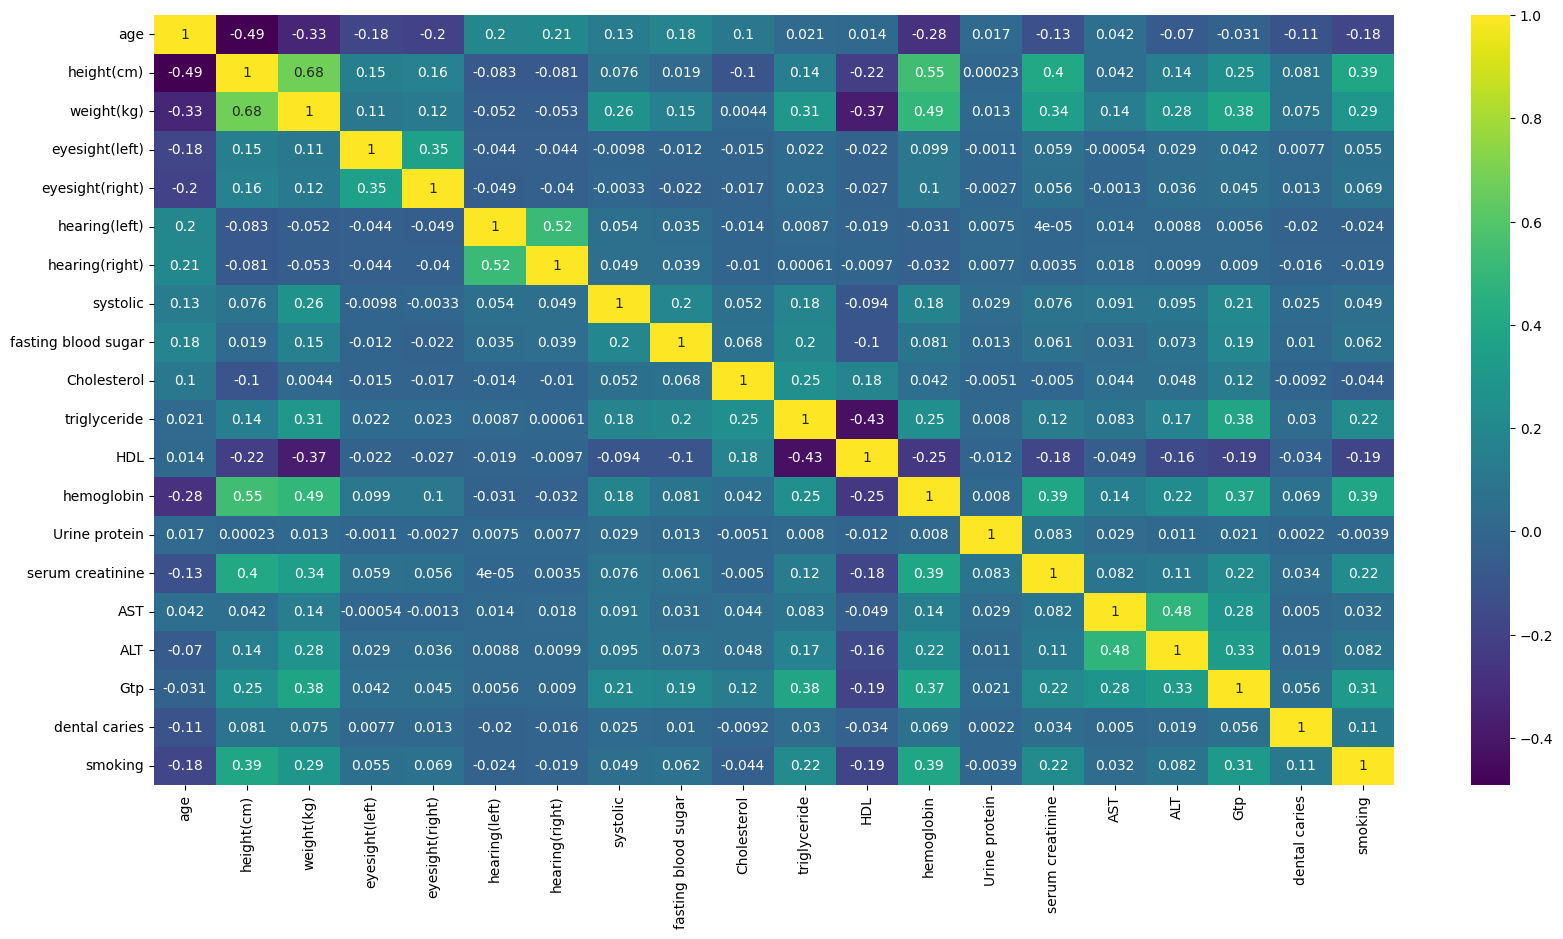

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df02.corr(), annot=True, cmap='viridis')

In [ ]:
df02.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
1,20,175,110,0.7,0.9,1,1,119,88,211,128,71,15.9,1,1.1,19,25,30,1,0
4,20,165,60,1.5,0.1,1,1,109,100,179,200,47,14.9,1,1.2,26,28,15,0,0
5,60,160,50,1.0,0.9,2,2,126,114,177,74,98,13.9,1,1.0,47,23,70,0,1
6,40,175,90,0.9,1.0,1,1,130,90,207,331,39,16.5,1,1.0,19,22,19,0,0
7,40,180,75,1.5,1.5,1,1,110,100,170,62,58,14.0,2,1.4,29,20,32,1,1


In [ ]:
df02.columns

Index(['age', 'height(cm)', 'weight(kg)', 'eyesight(left)', 'eyesight(right)',
       'hearing(left)', 'hearing(right)', 'systolic', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

## Import Libraries for ML Models

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

## Set Features and Label

In [ ]:
X_train =df02.drop(['smoking'],axis=1)
y_train =df02[['smoking']]

## Split Data to Train and Test, with ratio of 80% (80% Data as Train Data, 20% as Test Data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

## Logistic Regression to Test the Effect of Imbalanced

In [ ]:
lr=LogisticRegression(solver='liblinear', random_state=0).fit(X_train,y_train)
pred01=lr.predict(X_test)
model=accuracy_score(y_test,pred01)
matrix=confusion_matrix(y_test,pred01)
print(model)
print(matrix)
print(classification_report(y_test, pred01))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7376431585292345
[[3774  635]
 [1106 1121]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      4409
           1       0.64      0.50      0.56      2227

    accuracy                           0.74      6636
   macro avg       0.71      0.68      0.69      6636
weighted avg       0.73      0.74      0.73      6636



The accuracy is very good (74%), however, the as we can see the f1-score for smoking status =1, is rather poor. Only 50%.

## Handling the Imbalanced

We will go through two methods of handling the imbalanced. 1st we will use the Near Miss and second we will use SMOTE

### Near Miss : Under Sampling

In [ ]:
# apply near miss
from imblearn.under_sampling import NearMiss

In [ ]:
nr = NearMiss()

In [ ]:
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)

In [ ]:
print('Before Undersampling, the shape of train_X: {}'.format(X_train.shape))

Before Undersampling, the shape of train_X: (26540, 19)


In [ ]:
print('Before Undersampling, the shape of train_y: {}'.format(y_train.shape))

Before Undersampling, the shape of train_y: (26540, 1)


In [ ]:
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))

After Undersampling, the shape of train_X: (17612, 19)


In [ ]:
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

After Undersampling, the shape of train_y: (17612, 1) 



In [ ]:
print("Before Undersampling, counts of label '1': {}".format(np.sum(y_train == 1)))

Before Undersampling, counts of label '1': smoking    8806
dtype: int64


In [ ]:
print("Before Undersampling, counts of label '0': {}".format(np.sum(y_train == 0)))

Before Undersampling, counts of label '0': smoking    17734
dtype: int64


In [ ]:
print("After Undersampling, counts of label '1': {}".format(np.sum(y_train_miss == 1)))

After Undersampling, counts of label '1': smoking    8806
dtype: int64


In [ ]:
print("After Undersampling, counts of label '0': {}".format(np.sum(y_train_miss == 0)))

After Undersampling, counts of label '0': smoking    8806
dtype: int64


### Logistic Regression to Test Under Sampling Method

In [ ]:
lr2 = LogisticRegression()

In [ ]:
lr2.fit(X_train_miss, y_train_miss)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr2=LogisticRegression(solver='liblinear', random_state=0).fit(X_train_miss,y_train_miss)
pred01_miss=lr2.predict(X_test)
model_miss=accuracy_score(y_test,pred01_miss)
matrix_miss=confusion_matrix(y_test,pred01_miss)
print(model_miss)
print(matrix_miss)
print(classification_report(y_test, pred01_miss))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7043399638336347
[[3035 1374]
 [ 588 1639]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      4409
           1       0.54      0.74      0.63      2227

    accuracy                           0.70      6636
   macro avg       0.69      0.71      0.69      6636
weighted avg       0.74      0.70      0.71      6636



### SMOTE : Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 2)

In [ ]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
print('After SMOTE, the shape of train_X: {}'.format(X_train_res.shape))

After SMOTE, the shape of train_X: (35468, 19)


In [ ]:
print('After SMOTE, the shape of train_X: {}'.format(y_train_res.shape))

After SMOTE, the shape of train_X: (35468, 1)


In [ ]:
print("After SMOTE, counts of label '1': {}".format(np.sum(y_train_res == 1)))

After SMOTE, counts of label '1': smoking    17734
dtype: int64


In [ ]:
print("After SMOTE, counts of label '0': {}".format(np.sum(y_train_res == 0)))

After SMOTE, counts of label '0': smoking    17734
dtype: int64


### Logistic Regression Using SMOTE

In [ ]:
lr3=LogisticRegression(solver='liblinear', random_state=0).fit(X_train_res,y_train_res)
pred01_res=lr3.predict(X_test)
model_res=accuracy_score(y_test,pred01_res)
matrix_res=confusion_matrix(y_test,pred01_res)
print(model_res)
print(matrix_res)
print(classification_report(y_test, pred01_res))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7218203737191079
[[3062 1347]
 [ 499 1728]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      4409
           1       0.56      0.78      0.65      2227

    accuracy                           0.72      6636
   macro avg       0.71      0.74      0.71      6636
weighted avg       0.76      0.72      0.73      6636



**As We can see that using oversampling (SMOTE) gives better accuracy for both Smoking and Non-Smoking based on F-1 Score compare to under sampling (Near Miss). For the rest of training model we will use data from oversampling**

## KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_res,y_train_res)
pred02=knn.predict(X_test)
model02=accuracy_score(y_test,pred02)
matrix02=confusion_matrix(y_test,pred02)
print(model02)
print(matrix02)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6983122362869199
[[3161 1248]
 [ 754 1473]]


In [ ]:
print(classification_report(y_test, pred02))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      4409
           1       0.54      0.66      0.60      2227

    accuracy                           0.70      6636
   macro avg       0.67      0.69      0.68      6636
weighted avg       0.72      0.70      0.70      6636



## Naive Bayes

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train_res,y_train_res)
pred03=gnb.predict(X_test)
model03=accuracy_score(y_test,pred03)
matrix03=confusion_matrix(y_test,pred03)
print(model03)
print(matrix03)
print(classification_report(y_test, pred03))

0.6901748040988547
[[2650 1759]
 [ 297 1930]]
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      4409
           1       0.52      0.87      0.65      2227

    accuracy                           0.69      6636
   macro avg       0.71      0.73      0.69      6636
weighted avg       0.77      0.69      0.70      6636



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Tree

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train_res,y_train_res)
pred04=dt.predict(X_test)
model04=accuracy_score(y_test,pred04)
matrix04=confusion_matrix(y_test,pred04)
print(model04)
print(matrix04)
print(classification_report(y_test, pred04))

0.7518083182640145
[[3521  888]
 [ 759 1468]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4409
           1       0.62      0.66      0.64      2227

    accuracy                           0.75      6636
   macro avg       0.72      0.73      0.73      6636
weighted avg       0.76      0.75      0.75      6636



## Random Forest

In [ ]:
SEED = 42
rfs=RandomForestClassifier()
rfs.fit(X_train_res,y_train_res)
pred05=rfs.predict(X_test)
model05=accuracy_score(y_test,pred05)
matrix05=confusion_matrix(y_test,pred05)
print(model05)
print(matrix05)
print(classification_report(y_test, pred05))

<ipython-input-71-096f8d594c2f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfs.fit(X_train_res,y_train_res)


0.8007836045810729
[[3617  792]
 [ 530 1697]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      4409
           1       0.68      0.76      0.72      2227

    accuracy                           0.80      6636
   macro avg       0.78      0.79      0.78      6636
weighted avg       0.81      0.80      0.80      6636



## XG Boost

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
xgb.fit(X_train_res, y_train_res)
pred06=xgb.predict(X_test)
model06=accuracy_score(y_test,pred06)
matrix06=confusion_matrix(y_test,pred06)
print(model06)
print(matrix06)
print(classification_report(y_test, pred06))

0.7710970464135021
[[3648  761]
 [ 758 1469]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4409
           1       0.66      0.66      0.66      2227

    accuracy                           0.77      6636
   macro avg       0.74      0.74      0.74      6636
weighted avg       0.77      0.77      0.77      6636



## ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
ada.fit(X_train_res, y_train_res)
pred07=ada.predict(X_test)
model07=accuracy_score(y_test,pred07)
matrix07=confusion_matrix(y_test,pred07)
print(model07)
print(matrix07)
print(classification_report(y_test, pred07))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7270946353224834
[[3130 1279]
 [ 532 1695]]
              precision    recall  f1-score   support

           0       0.85      0.71      0.78      4409
           1       0.57      0.76      0.65      2227

    accuracy                           0.73      6636
   macro avg       0.71      0.74      0.71      6636
weighted avg       0.76      0.73      0.73      6636



**Based on trained model above we can use Randomforest with the highest accuracy of 80%**

# Predict from Dataset Test

In [ ]:
url_df = 'https://drive.google.com/file/d/1JvC6bLq6nkTsoWmGiocQ8Tb3-Q876Mm0/view?usp=share_link'
path_df = 'https://drive.google.com/uc?export=download&id='+url_df.split('/')[-2]
dftest = pd.read_csv(path_df)

In [ ]:
dftest.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,170,65,75.1,1.0,0.9,1,1,120,70,...,260,41,132,15.7,1,0.8,24,26,32,0
1,45,170,75,89.0,0.7,1.2,1,1,100,67,...,345,49,140,15.7,1,1.1,26,28,138,0
2,30,180,90,94.0,1.0,0.8,1,1,115,72,...,103,53,103,13.5,1,1.0,19,29,30,0
3,60,170,50,73.0,0.5,0.7,1,1,118,78,...,70,65,108,14.1,1,1.3,31,28,33,0
4,30,170,65,78.0,1.5,1.0,1,1,110,70,...,210,45,103,14.7,1,0.8,21,21,19,0


## Drop LDL, Relaxation and Waist (CM)

In [ ]:
dftest.drop(['LDL'], axis=1, inplace=True)

In [ ]:
dftest.drop(['relaxation'], axis=1, inplace=True)

In [ ]:
dftest.drop(['waist(cm)'],axis=1, inplace=True)

### Result of Prediction using Test Dataset

In [ ]:
dftest['smoking']=rfs.predict(dftest)
dftest


,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,40,170,65,1.0,0.9,1,1,120,102,225,260,41,15.7,1,0.8,24,26,32,0,1
1,45,170,75,0.7,1.2,1,1,100,96,258,345,49,15.7,1,1.1,26,28,138,0,1
2,30,180,90,1.0,0.8,1,1,115,88,177,103,53,13.5,1,1.0,19,29,30,0,0
3,60,170,50,0.5,0.7,1,1,118,86,187,70,65,14.1,1,1.3,31,28,33,0,0
4,30,170,65,1.5,1.0,1,1,110,87,190,210,45,14.7,1,0.8,21,21,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,60,165,65,0.7,1.0,1,1,101,140,177,131,41,13.5,1,0.8,78,75,33,0,0
16704,60,155,70,0.8,1.0,1,1,134,97,165,259,53,13.9,1,0.7,19,28,28,1,0
16705,40,155,50,0.9,0.8,1,1,134,91,206,50,64,13.4,1,0.7,16,10,14,0,0
16706,35,165,70,1.0,1.0,1,1,114,109,201,43,74,14.3,1,1.2,19,28,30,1,0


In [ ]:
dfsubs = dftest.loc[:, ['smoking']]

In [ ]:
dfsubs

,smoking
0,1
1,1
2,0
3,0
4,0
...,...
16703,0
16704,0
16705,0
16706,0


In [ ]:
dfsubs=dfsubs.reset_index(drop=True)

In [ ]:
dfsubs

,smoking
0,1
1,1
2,0
3,0
4,0
...,...
16703,0
16704,0
16705,0
16706,0


In [ ]:
dfsubs.to_csv('smoker-status.csv', index=False)